In [4]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'learn.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', 'learn.ipynb'], returncode=4294967295)

In [7]:
import datetime as dt
from datetime import timedelta
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
#from pdpbox import pdp
from Controllers import databases as db
from Controllers import transforms as tr
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import xgboost as xgb
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
from sklearn.linear_model import LinearRegression

In [8]:


def config():
   # DataFrameを表示する際の折り返す横幅の設定
    pd.set_option('display.width', 200)

    # DataFrameを表示する際、全てのDataFrame を表示させる設定
    # デフォルトは一番最後のDataFrame一つのみ
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = 'all'

    # DataFrameを表示するとき、表示する行数
    # とりあえず最大５０００行表示するようにする
    pd.set_option('display.max_rows', 5000)

    # DataFrameを省略せず全部表示（多分ね）
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = 'all'
    pd.set_option('display.max_columns', 100)

config()

### おそらく毎回承認が必要です。
# リンクを踏み、指示通りに進める。ログイン・アクセス権の許可後URLが表示されえる。それをコピー＆以下にペーストで完了。
is_google=False
if is_google:
    Folder ='drive/My Drive/doShare/lab/4_code/softkyushu_201911/predict_Detailes`'
    from google.colab import drive
    drive.mount('/content/drive')
else:
    Folder ='.'
        
fsize = (16,12)
fsize_title = 30
fsize_label = 20


# 新データ読み込み

In [32]:
record = pd.read_csv("./202111_new_data-20220405T023020Z-001/202111_new_data/tmp_anonymized_1.csv", index_col=0)
#RECORD.isnull().sum()
record = record.fillna('FILL')
#RECORD = RECORD.loc[(RECORD["value"] != "FILL")]
record = record.sort_values(by='created_at') 
#RECORD

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [33]:
#データフレームの特定の行の要素を配列として出力する
target_id = set(record['pseudonymized_customer_id'])
target_id = list(target_id)
target_id
len(target_id)

['129259f1-ce00-4715-8108-1a63c2d02f80',
 '59331efe-e5b6-4b5f-a8cd-a8fa30842f94',
 '8d05ec6d-1304-416f-996b-3260607c3d26',
 '90b96d4e-ccdd-4753-a6d3-f502be68f20b',
 '3766bb0f-8ef9-4d9d-84c5-8d20e12c6aff',
 '85b6e789-54a8-4b4d-94bd-374eecce0cdb',
 '8451babc-e023-4239-b114-64150af57978',
 'c8655e29-33b8-478f-ba27-3534e58ed7cd',
 'a6251eca-369a-4383-a185-292429670bef',
 '33b9d9f3-4495-455f-ac83-3bb43d8b86a0',
 '8098fb6d-061d-4c0d-b732-768801460d3a',
 '27e711be-cdc3-486c-92f2-f11c3729ee8c',
 '96533f50-3e1e-4fb5-8ae4-d052328e9a80',
 'ff7b41e7-dc22-4282-b207-51f6a3ad9b74',
 '31970314-30cc-4547-a72a-cdcb92516fd2',
 'a1039bc3-4da4-4e9a-98fa-ad337711add5',
 'e404607b-fa6b-46f7-84d3-ed0bd07647f3',
 '62d97f08-642e-4a75-906a-ae24d76c1528',
 '2419dfe9-87cf-4e8a-bde5-f6f6213d56d1',
 '3d98222f-0b50-4ee0-af78-0d44ceda4f5f',
 'e7b14234-36ad-47cf-98fd-cbf8e6081ee3',
 '527c0bd1-0877-45ab-b615-8258e2e579ad',
 '01828c91-5f47-45b5-b063-46d48d6215f3',
 'e73c57d4-88eb-4ac6-8a28-c72c5ad091a3',
 'e0d26aa3-8419-

80

In [38]:
excretion = RECORD[RECORD['pseudonymized_customer_id'].isin(['e7b14234-36ad-47cf-98fd-cbf8e6081ee3'])]
excretion.iloc[0:4999]

activity_type_id         activity activity_group               created_at               started_at              finished_at               deleted_at user_tag  \
local_id                                                                                                                                                                                             
7b936fb6-7bd6-4e1c-a4aa-427550f5b51b              2.0            食事・服薬           介護行動  2020-12-31 06:09:07 UTC  2020-12-31 06:08:17 UTC  2020-12-31 06:08:17 UTC                     FILL     FILL   
f4803eeb-6ac3-412d-ad60-ea1093423a51             10.0  日中利用者対応：1-①2-①②           記録関係  2020-12-31 06:10:02 UTC  2020-12-31 06:08:36 UTC  2020-12-31 06:08:37 UTC                     FILL     FILL   
eb726da5-b237-4400-91a5-a1541fb72f43              2.0            食事・服薬           介護行動  2020-12-31 07:31:03 UTC  2020-12-31 08:30:00 UTC  2020-12-31 09:30:00 UTC                     FILL     FILL   
96cb6d3d-e286-4faa-9b74-cb86eccf3e60              2.0            食事・服薬           介護行動  2020-12-31 10:05:09 UTC  2020-12-31 10:04:30 UTC  2020-12-31 10:04:31 UTC                     FILL     FILL   
952b6355-99a6-4d68-8643-37eec721e10b              3.0         口腔ケア：1-⑥           介護行動  2020-12-31 10:06:15 UTC  2020-12-31 09:00:00 UTC  2020-12-31 09:00:00 UTC                     FILL     FILL   
fdb8691e-16c7-4140-8128-8d965110f458              4.0           排泄：1-④           介護行動  2020-12-31 10:08:02 UTC  2020-12-31 12:00:00 UTC  2020-12-31 12:00:00 UTC                     FILL     FILL   
6cec1b19-44dd-4910-bb18-dab145f67d44             12.0  夜間利用者対応：1-①2-①②           記録関係  2020-12-31 13:04:02 UTC  2020-12-31 12:00:00 UTC  2020-12-31 12:00:00 UTC                     FILL     FILL   
c234c29e-fbfc-4365-92bf-375b6fa9a17d              4.0           排泄：1-④           介護行動  2020-12-31 13:47:02 UTC  2020-12-31 12:25:00 UTC  2020-12-31 12:25:00 UTC                     FILL     FILL   
0992c594-424c-4312-9a68-30fe8cb2fd0e             12.0  夜間利用者対応：1-①2-①②           記録関係  2020-12-31 14:25:01 UTC  2020-12-31 14:00:00 UTC  2020-12-31 14:00:00 UTC                     FILL     FILL   
ade5c62b-9657-4099-8f8a-314fa3207e87             12.0  夜間利用者対応：1-①2-①②           記録関係  2020-12-31 14:44:01 UTC  2020-12-31 16:00:00 UTC  2020-12-31 16:00:00 UTC                     FILL     FILL   
1bff67b2-0384-4bd6-8057-a0ce3f7b1a94             12.0  夜間利用者対応：1-①2-①②           記録関係  2020-12-31 16:51:01 UTC  2020-12-31 18:00:00 UTC  2020-12-31 18:00:00 UTC                     FILL     FILL   
d11d03c4-004c-4001-ac6e-500f394f8915             12.0  夜間利用者対応：1-①2-①②           記録関係  2020-12-31 17:25:02 UTC  2020-12-31 20:00:00 UTC  2020-12-31 20:00:00 UTC                     FILL     FILL   
65da607f-2d1b-4a3f-a3e4-8766a7b56ad8              1.0         バイタル：1-①           介護行動  2020-12-31 17:35:13 UTC  2020-12-31 21:00:00 UTC  2020-12-31 21:00:00 UTC                     FILL     FILL   
a98a5aba-b837-4f07-82e0-2c213224dd5b              2.0            食事・服薬           介護行動  2020-12-31 17:36:13 UTC  2020-12-31 22:30:00 UTC  2020-12-31 23:30:00 UTC                     FILL     FILL   
6b27ff0c-84d6-4f9b-a897-7e2f15e984d7              4.0           排泄：1-④           介護行動  2020-12-31 23:56:03 UTC  2020-12-31 21:15:00 UTC  2020-12-31 21:15:00 UTC  2020-12-31 23:56:03 UTC     FILL   
4ea6f14f-30dd-46f9-a5fb-67b70ff2ed9a              4.0           排泄：1-④           介護行動  2020-12-31 23:57:02 UTC  2020-12-31 21:25:00 UTC  2020-12-31 21:40:00 UTC                     FILL     FILL   
580d2509-6f02-4dd3-9917-4df1e51933eb             16.0        清掃・整理：1-①           サポート  2021-01-01 00:39:02 UTC  2020-12-31 23:37:00 UTC  2020-12-31 23:37:00 UTC                     FILL     FILL   
dd2326d5-08e0-4a65-a680-d5e4c07774dd             10.0  日中利用者対応：1-①2-①②           記録関係  2021-01-01 01:08:10 UTC  2021-01-01 01:07:43 UTC  2021-01-01 01:07:44 UTC                     FILL     FILL   
2e8ef496-f87d-4456-a77c-ac42ee07b05e              4.0           排泄：1-④       

In [35]:
target_No = {}
num = 1
for i in target_id:
    if i == 'FILL':
        continue
    target_No[i] = num
    num = num + 1
target_No['FILL'] = 80
target_No


{'129259f1-ce00-4715-8108-1a63c2d02f80': 1,
 '59331efe-e5b6-4b5f-a8cd-a8fa30842f94': 2,
 '8d05ec6d-1304-416f-996b-3260607c3d26': 3,
 '90b96d4e-ccdd-4753-a6d3-f502be68f20b': 4,
 '3766bb0f-8ef9-4d9d-84c5-8d20e12c6aff': 5,
 '85b6e789-54a8-4b4d-94bd-374eecce0cdb': 6,
 '8451babc-e023-4239-b114-64150af57978': 7,
 'c8655e29-33b8-478f-ba27-3534e58ed7cd': 8,
 'a6251eca-369a-4383-a185-292429670bef': 9,
 '33b9d9f3-4495-455f-ac83-3bb43d8b86a0': 10,
 '8098fb6d-061d-4c0d-b732-768801460d3a': 11,
 '27e711be-cdc3-486c-92f2-f11c3729ee8c': 12,
 '96533f50-3e1e-4fb5-8ae4-d052328e9a80': 13,
 'ff7b41e7-dc22-4282-b207-51f6a3ad9b74': 14,
 '31970314-30cc-4547-a72a-cdcb92516fd2': 15,
 'a1039bc3-4da4-4e9a-98fa-ad337711add5': 16,
 'e404607b-fa6b-46f7-84d3-ed0bd07647f3': 17,
 '62d97f08-642e-4a75-906a-ae24d76c1528': 18,
 '2419dfe9-87cf-4e8a-bde5-f6f6213d56d1': 19,
 '3d98222f-0b50-4ee0-af78-0d44ceda4f5f': 20,
 'e7b14234-36ad-47cf-98fd-cbf8e6081ee3': 21,
 '527c0bd1-0877-45ab-b615-8258e2e579ad': 22,
 '01828c91-5f47-45b

# 旧データ読み込み

In [5]:
RECORD = db.getPreprocessedData()
#RECORD = RECORD[RECORD['record_type'].isin(['排尿量','水分量'])]
#RECORD = RECORD[RECORD['record_type'].isin(['排便量','排尿量','食事量','水分量'])]
#test_data = RECORD[pd.to_datetime('2018-06-29 00:00:00+09:00') <= RECORD['start']][RECORD['target_id'].isin([92,36])]
#test_data = test_data.sort_values(by='target_id') 
#test_data = test_data.sort_values(by='start') 
#test_data

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [10]:
#探しているcolumnsがデータフレームの何番目にあるか
def columns_num(culumns_name):
    count = 0
    for i in RECORD.columns:
        if i == culumns_name:
            break
        count = count + 1
    return count

In [11]:
#ここから
RECORD = db.getPreprocessedData()
RECORD = RECORD.sort_values(by='start') 
#RECORD

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3361: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
#excretion = RECORD[RECORD['record_type'].isin(['排尿量'])]
RECORD = RECORD[RECORD['target_id'].isin([29,31,35,36,38,40,43,44,45,48,53,59,61])]
#RECORD
len(RECORD)

30061

In [14]:
#特定のレコードを排除するメソッド
#データフレームの構造に依存するため、構造が変わる場合に要注意
#現状は同じ時間のレコードは時間予測に影響を及ぼすことが懸念されるためこれメソッドを使用する
#RECORD:データフレーム、drop_type:落としたい行動種類
def record_drop(RECORD, drop_type):
    record_columns = []
    for k in range(len(RECORD)):
        if RECORD.iloc[k,6] in drop_type:
            record_columns.append(k)

    RECORD = RECORD.drop(RECORD.index[[record_columns]])
    return RECORD


In [15]:
RECORD = record_drop(RECORD, ['排泄介助', '食事介助', '排泄方法','食事量(副食)','入浴介助','便の状態'])#服薬
len(RECORD)

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


17633

# データの可視化

# 仮説1:時間帯ごとの相関をみる

In [152]:
#レコードの起こった時間(開始)時間帯を棒グラフとして出力する
#hourは

def hour_bar(RECORD, record_type, target):
    RECORD = RECORD[RECORD['record_type'] == record_type]
    RECORD = RECORD[RECORD['target_id'].isin(target)]
    
    hour = RECORD['hour']
    hour = hour.values
    count = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    hour_time = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    
    for i in hour:
        count[i] = count[i] + 1
    ax = plt.bar(hour_time,count)
    
    x1 = hour_time
    y1 = count
    for i in range(len(y1)):
        y1[i] = len(RECORD)/24
    
    plt.rcParams["figure.figsize"] = (6.4,4.8)
    #ax = plt.plot(x1, y1, color = 'red', marker = 'o')
    plt.xlabel('時刻',fontname="Meiryo", fontsize=18)
    plt.ylabel('回数',fontname="Meiryo", fontsize=18)
    #plt.title('1日の時刻と回数分布',fontname="Meiryo", fontsize=18)
    print(target, "の", record_type, "の回数は62日間で合計", len(RECORD))
    print("62日間で割った平均は", len(RECORD)/62, "24時間で割った平均は", len(RECORD)/24)
    #print("赤い線は24時間で割った平均回数です")

In [160]:
hour_bar(RECORD, '排尿量' , [35])

[35] の 排尿量 の回数は62日間で合計 274
62日間で割った平均は 4.419354838709677 24時間で割った平均は 11.416666666666666


<BarContainer object of 24 artists>

In [26]:
hour_bar(RECORD, '排便量' , [31])

[31] の 排便量 の回数は62日間で合計 72
62日間で割った平均は 1.1612903225806452 24時間で割った平均は 3.0
赤い線は24時間で割った平均回数です


[29] の 食事量(主食) の回数は62日間で合計 204
62日間で割った平均は 3.2903225806451615 24時間で割った平均は 8.5
赤い線は24時間で割った平均回数です


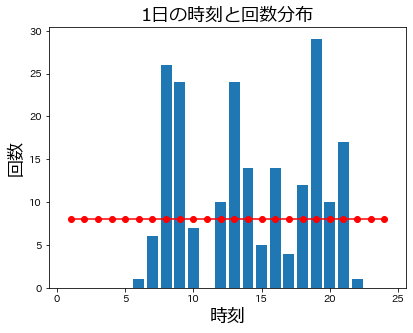

In [16]:
hour_bar(RECORD, '食事量(主食)' , [31])

[31] の 水分量 の回数は62日間で合計 177
62日間で割った平均は 2.8548387096774195 24時間で割った平均は 7.375
赤い線は24時間で割った平均回数です


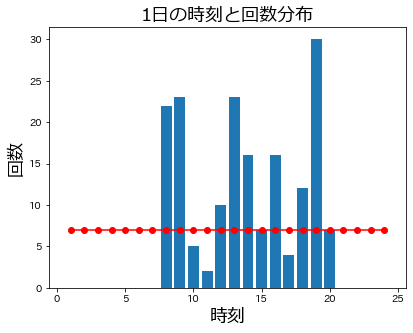

In [30]:
hour_bar(RECORD, '水分量' , [31])

In [12]:
#挙動確認済
#日ごとの時間帯において排尿をしたかどうかの配列を返すメソッド
#targetはひとりまで
# urine_hour_cor_dfには時間帯ごとの相関係数が入ったデータフレームがリターンされる
#現状排尿が起こった時間帯を1, 起こらなかった場合を0としており、その場合の相関係数を出している
def hour_plot_corr(RECORD, record_type, target):
    RECORD = RECORD[RECORD['record_type'] == record_type]
    RECORD = RECORD[RECORD['target_id'].isin(target)]
    
    hour_dic = {}
    
    array = []
    hour_urine_cor = []
    
    date_array = []
    date_array = [RECORD["year-month-date"]]
    date_array = set(date_array[0])
    date_array = list(date_array)
    date_array.sort()
    
    for i in range(0,24):
        hour_dic[i] = []
    
       
    for date in date_array:
        RECORD_day = RECORD[RECORD["year-month-date"].isin([date])]
        hour_array = RECORD_day["hour"]
        hour_array = [int(s) for s in hour_array]
        for key in hour_dic.keys():
            if key in hour_array:
                hour_dic[key].append(1)
            else:
                hour_dic[key].append(0)
            
    for key in hour_dic.keys():
        for key2 in hour_dic.keys():
            cor = np.corrcoef(hour_dic[key], hour_dic[key2])
            print(key, "時と",  key2, "時の相関は", cor)
            array.append(cor[0][1])
        hour_urine_cor.append(array)
        array = []
    
    urine_hour_cor_df = pd.DataFrame(data=hour_urine_cor, index=hour_dic.keys(), columns=hour_dic.keys())
    
    print(date_array)
    print(hour_dic)
    print(len(hour_dic[1]))
    
    return hour_dic, urine_hour_cor_df

In [13]:

hour_dic, urine_hour_cor_df = hour_plot_corr(RECORD, "排尿量", [35])



0 時と 0 時の相関は [[1. 1.]
 [1. 1.]]
0 時と 1 時の相関は [[ 1.         -0.22832066]
 [-0.22832066  1.        ]]
0 時と 2 時の相関は [[1.         0.07382176]
 [0.07382176 1.        ]]
0 時と 3 時の相関は [[1.         0.12868423]
 [0.12868423 1.        ]]
0 時と 4 時の相関は [[1.         0.17343589]
 [0.17343589 1.        ]]
0 時と 5 時の相関は [[1.        0.1057122]
 [0.1057122 1.       ]]
0 時と 6 時の相関は [[ 1.       -0.052177]
 [-0.052177  1.      ]]
0 時と 7 時の相関は [[ 1.         -0.17162257]
 [-0.17162257  1.        ]]
0 時と 8 時の相関は [[ 1.         -0.17335882]
 [-0.17335882  1.        ]]
0 時と 9 時の相関は [[ 1.         -0.01818108]
 [-0.01818108  1.        ]]
0 時と 10 時の相関は [[1.         0.10499682]
 [0.10499682 1.        ]]
0 時と 11 時の相関は [[ 1.         -0.13669398]
 [-0.13669398  1.        ]]
0 時と 12 時の相関は [[ 1.         -0.22832066]
 [-0.22832066  1.        ]]
0 時と 13 時の相関は [[1.         0.07382176]
 [0.07382176 1.        ]]
0 時と 14 時の相関は [[ 1.         -0.00956949]
 [-0.00956949  1.        ]]
0 時と 15 時の相関は [[ 1.         -0.01584858]
 [-0.0

 [0.14551469 1.        ]]
16 時と 7 時の相関は [[ 1.         -0.04273504]
 [-0.04273504  1.        ]]
16 時と 8 時の相関は [[1.         0.01781222]
 [0.01781222 1.        ]]
16 時と 9 時の相関は [[1.         0.15380401]
 [0.15380401 1.        ]]
16 時と 10 時の相関は [[ 1.         -0.12431129]
 [-0.12431129  1.        ]]
16 時と 11 時の相関は [[ 1.         -0.12431129]
 [-0.12431129  1.        ]]
16 時と 12 時の相関は [[ 1.         -0.11020775]
 [-0.11020775  1.        ]]
16 時と 13 時の相関は [[ 1.         -0.08959551]
 [-0.08959551  1.        ]]
16 時と 14 時の相関は [[ 1.         -0.20587905]
 [-0.20587905  1.        ]]
16 時と 15 時の相関は [[1.         0.04419957]
 [0.04419957 1.        ]]
16 時と 16 時の相関は [[1. 1.]
 [1. 1.]]
16 時と 17 時の相関は [[ 1.         -0.09461636]
 [-0.09461636  1.        ]]
16 時と 18 時の相関は [[ 1.         -0.10362697]
 [-0.10362697  1.        ]]
16 時と 19 時の相関は [[1.         0.00925241]
 [0.00925241 1.        ]]
16 時と 20 時の相関は [[ 1.         -0.12431129]
 [-0.12431129  1.        ]]
16 時と 21 時の相関は [[1.         0.21927061]
 [0.21927

In [14]:
urine_hour_cor_df

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18  \
0   1.000000 -0.228321  0.073822  0.128684  0.173436  0.105712 -0.052177 -0.171623 -0.173359 -0.018181  0.104997 -0.136694 -0.228321  0.073822 -0.009569 -0.015849  0.015323 -0.042722  0.199057   
1  -0.228321  1.000000 -0.131095 -0.021787  0.197368 -0.095377  0.004343 -0.110208 -0.087496 -0.164661 -0.079156  0.403695  0.197368  0.368704 -0.131095  0.162270  0.076533 -0.060248 -0.137862   
2   0.073822 -0.131095  1.000000 -0.537243  0.202104 -0.048786  0.008114  0.142972 -0.024972  0.152294  0.002465  0.002465 -0.131095  0.066327 -0.141156  0.002465  0.259255 -0.112548  0.044574   
3   0.128684 -0.021787 -0.537243  1.000000 -0.287588  0.021997  0.116505  0.104928  0.193772 -0.087808 -0.204465  0.035388  0.111113 -0.123457 -0.123457  0.035388  0.012166  0.057361 -0.082968   
4   0.173436  0.197368  0.202104 -0.287588  1.000000 -0.095377 -0.260599 -0.110208 -0.087496 -0.016950  0.162270 -0.079156 -0.070175  0.202104 -0.131095 -0.079156  0.076533 -0.060248  0.023861   
5   0.105712 -0.095377 -0.048786  0.021997 -0.095377  1.000000 -0.251304 -0.149786 -0.118918  0.120360 -0.107583 -0.107583 -0.095377 -0.178174  0.339379 -0.107583 -0.149786  0.155969  0.063830   
6  -0.052177  0.004343  0.008114  0.116505 -0.260599 -0.251304  1.000000 -0.224335  0.115526 -0.026377 -0.293948  0.184208 -0.260599  0.090603 -0.156866  0.064669  0.145515  0.079549 -0.271729   
7  -0.171623 -0.110208  0.142972  0.104928 -0.110208 -0.149786 -0.224335  1.000000  0.017812 -0.052395  0.044200  0.044200  0.076533 -0.089596 -0.205879  0.212710 -0.042735 -0.094616  0.122132   
8  -0.173359 -0.087496 -0.024972  0.193772 -0.087496 -0.118918  0.115526  0.017812  1.000000 -0.205302 -0.098693  0.101983  0.134889 -0.024972 -0.163451 -0.098693  0.017812 -0.075117 -0.171888   
9  -0.018181 -0.164661  0.152294 -0.087808 -0.016950  0.120360 -0.026377 -0.052395 -0.205302  1.000000 -0.185733 -0.052442 -0.164661 -0.215624 -0.031665 -0.185733  0.153804  0.196804 -0.055621   
10  0.104997 -0.079156  0.002465 -0.204465  0.162270 -0.107583 -0.293948  0.044200 -0.098693 -0.185733  1.000000 -0.089286  0.162270  0.002465  0.303136  0.128571 -0.124311 -0.067958 -0.009569   
11 -0.136694  0.403695  0.002465  0.035388 -0.079156 -0.107583  0.184208  0.044200  0.101983 -0.052442 -0.089286  1.000000  0.162270  0.152800 -0.147871 -0.089286 -0.124311 -0.067958 -0.009569   
12 -0.228321  0.197368 -0.131095  0.111113 -0.070175 -0.095377 -0.260599  0.076533  0.134889 -0.164661  0.162270  0.162270  1.000000 -0.131095  0.035505 -0.079156 -0.110208 -0.060248  0.023861   
13  0.073822  0.368704  0.066327 -0.123457  0.202104 -0.178174  0.090603 -0.089596 -0.024972 -0.215624  0.002465  0.152800 -0.131095  1.000000 -0.141156  0.002465 -0.089596 -0.112548  0.044574   
14 -0.009569 -0.131095 -0.141156 -0.123457 -0.131095  0.339379 -0.156866 -0.205879 -0.163451 -0.031665  0.303136 -0.147871  0.035505 -0.141156  1.000000 -0.147871 -0.205879  0.078159  0.044574   
15 -0.015849  0.162270  0.002465  0.035388 -0.079156 -0.107583  0.064669  0.212710 -0.098693 -0.185733  0.128571 -0.089286 -0.079156  0.002465 -0.147871  1.000000  0.044200 -0.067958 -0.155504   
16  0.015323  0.076533  0.259255  0.012166  0.076533 -0.149786  0.145515 -0.042735  0.017812  0.153804 -0.124311 -0.124311 -0.110208 -0.089596 -0.205879  0.044200  1.000000 -0.094616 -0.103627   
17 -0.042722 -0.060248 -0.112548  0.057361 -0.060248  0.155969  0.079549 -0.094616 -0.075117  0.196804 -0.067958 -0.067958 -0.060248 -0.112548  0.078159 -0.067958 -0.094616  1.000000 -0.118358   
18  0.199057 -0.137862  0.044574 -0.082968  0.023861  0.063830 -0.271729  0.122132 -0.171888 -0.055621 -0.009569 -0.009569  0.023861  0.044574  0.044574 -0.155504 -0.103627 -0.118358  1.000000   
19 -0.286643  0.347305 -0.156835  0.077700  0.023861 -0.061771  0.048570  0.009252  0.0969

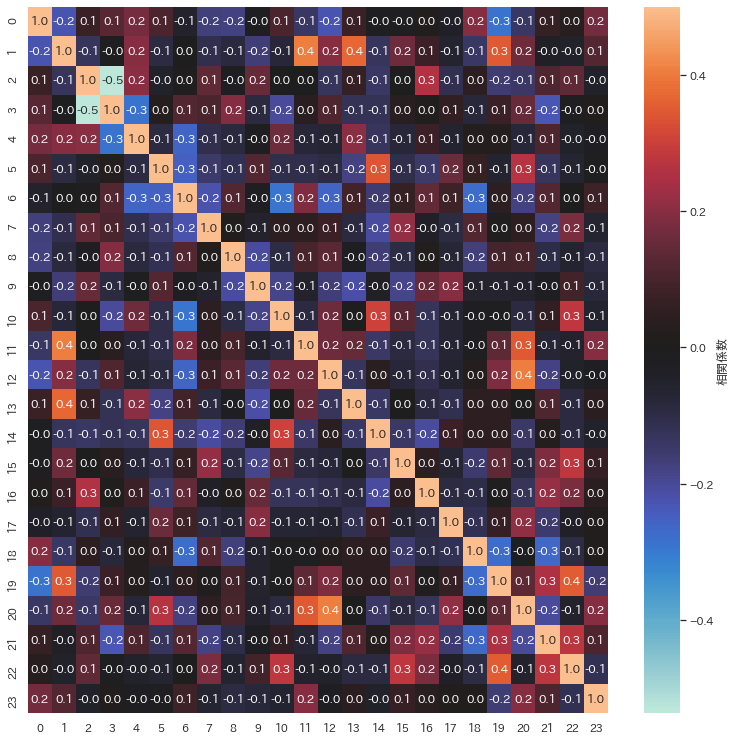

In [77]:
#各時間同士の相関係数をヒートマップ化する

#urine_hour_cor_df
bb = sns.heatmap(urine_hour_cor_df, vmax = 0.5, annot=True, fmt="1.1f", center=0)
bb.collections[0].colorbar.set_label('相関係数')
japanize_matplotlib.japanize()
sns.set(rc = {'figure.figsize':(13,13)})

In [72]:
#排尿が起こった時間帯を1, 起こらなかった場合を0としており、乱数を加えたバージョン
#DICOMOには乱数バージョンは使っていない
import random

d2={}
for k,v in hour_dic.items():   # 一度pd.Seriesに変換
    d2[k]=pd.Series(v)

df=pd.DataFrame(d2)
#df

df2 = df + np.random.normal(loc=0.0, scale=0.05, size=(61,24))
df2

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18  \
0   0.011322 -0.006175  0.997699  0.019244 -0.015580  0.056907 -0.078674  0.007593 -0.007891  0.009078 -0.047271 -0.045242  0.041542  0.002942  0.008467  0.009993  0.109661 -0.066232 -0.069799   
1  -0.040991 -0.041062  0.053562  0.068434 -0.002066 -0.035169 -0.026412 -0.022709 -0.041145  1.025455 -0.050514  0.042512  0.019563  0.003867  0.000520  1.085905 -0.077029 -0.060484  0.102700   
2  -0.106399 -0.055035  0.056276  0.000897  0.056681 -0.017379  0.015121  0.055657  0.103750  0.032548 -0.079472  0.025152  0.991447  0.049501  0.011336  0.072824 -0.063317 -0.026724 -0.080162   
3   0.052954 -0.077764  1.078117 -0.024554  0.017153  0.076102 -0.046125  0.950408 -0.039443  1.015892 -0.026493  0.950741  0.035862 -0.016429 -0.019231  1.072615  0.075806  0.025688 -0.014326   
4   1.015761 -0.049729  0.000232  0.967016  0.003417  0.070623 -0.013937  1.031538 -0.003561  0.075247  0.034505  0.020693  0.019108  1.059704 -0.050244  0.015180  0.067189 -0.122712  0.060388   
5   1.105769 -0.023186 -0.044648  0.161164  0.085183  0.092323  0.023770  0.987530 -0.018978  0.981835  0.042666  0.044795 -0.033831 -0.021310  0.983950  0.012286 -0.013422 -0.020978  0.000845   
6   0.037652 -0.029250 -0.016008  1.015441  0.004414 -0.124696  1.021090 -0.014774  1.062311 -0.047253 -0.054023 -0.096439  0.032860  0.028383  1.071793  0.025175  0.902482  0.005583  0.007983   
7   0.038868  0.074705 -0.010312 -0.062634 -0.031240 -0.054310  0.097437  0.066861  0.033600 -0.011287  0.042374 -0.025784 -0.003214 -0.024103 -0.015918 -0.029276  0.058120  0.016942  0.002656   
8   1.026319  0.081358 -0.006768  0.946816 -0.028045  0.019741  0.041684  0.946915  0.120538  0.926935 -0.017912  0.972153  0.031800 -0.005357 -0.026088  0.038631  1.052036 -0.019602  0.957003   
9   0.978036 -0.045269 -0.015891  1.031909  0.061788  0.041459  0.980390 -0.046794 -0.021747 -0.016546 -0.032368 -0.007360 -0.052156 -0.092989  0.084885  0.873650  0.017791  0.017700 -0.028460   
10  0.977809  0.034725  0.031108  0.907526 -0.003098  0.015491 -0.090550  0.972547 -0.011696 -0.020197 -0.062269  0.038193  0.010776 -0.004403 -0.043074  0.035834  0.994568  0.039361 -0.063470   
11  0.012954  0.013891  1.046464 -0.055492  0.041567 -0.030218 -0.074308  0.984532 -0.044662 -0.063702  0.022040 -0.049695  0.043404  0.013412 -0.013636  1.040767  0.048354 -0.001506 -0.065091   
12  0.957876 -0.044118  1.022624  0.054261  0.120566  0.008535  0.960116  0.033275  0.094763  0.945821  0.075385  1.112300 -0.080266  0.014480 -0.089817  0.019046  0.028589  1.049209 -0.000439   
13  0.968194  0.008366  0.025059  0.967628  0.016666 -0.033703  0.020841  0.994211 -0.020813  0.001887 -0.050934  1.117243 -0.034406  0.006755  0.101126 -0.011355 -0.017752  0.124565 -0.002138   
14  0.981578 -0.061851  0.048445  0.930950  0.049129  0.080718  0.049895  0.009100  0.066840 -0.047902  1.022212 -0.148015 -0.098154  0.013740  0.051971  1.023924 -0.065758 -0.068678  0.014263   
15  0.840118  0.029974 -0.063365  0.003266  0.132157 -0.041535 -0.051130  0.092198 -0.095879 -0.047548 -0.044853 -0.002132  0.046041 -0.004134  0.034261  0.082689  0.000205  0.046416  0.060036   
16  0.037790 -0.015337 -0.009567  1.093018  0.064529  0.058389  1.015133  0.045401 -0.035337 -0.029455 -0.007570  0.021451 -0.076755  0.100756  0.074587 -0.047925  0.065935 -0.056439  1.080737   
17  0.959748  0.006862  0.030099  1.011487  0.016087  0.149489 -0.036309  0.991874  0.045903  0.960399  0.048546  1.012563 -0.065937 -0.033048  0.007437  0.990397 -0.068344  0.041308 -0.007907   
18  1.028122 -0.047283 -0.011332 -0.002776  0.950179  0.028847  0.037596 -0.077064 -0.032115  0.042539 -0.084451  0.046873  0.067347  0.007223 -0.008551  0.008727  0.060269  0.034783  0.086820   
19  1.049580 -0.050759  0.024338  0.930365 -0.077413  0.013091  0.023915  0.991557  0.0662

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 30456 missing from current font.
  font.set_text(s

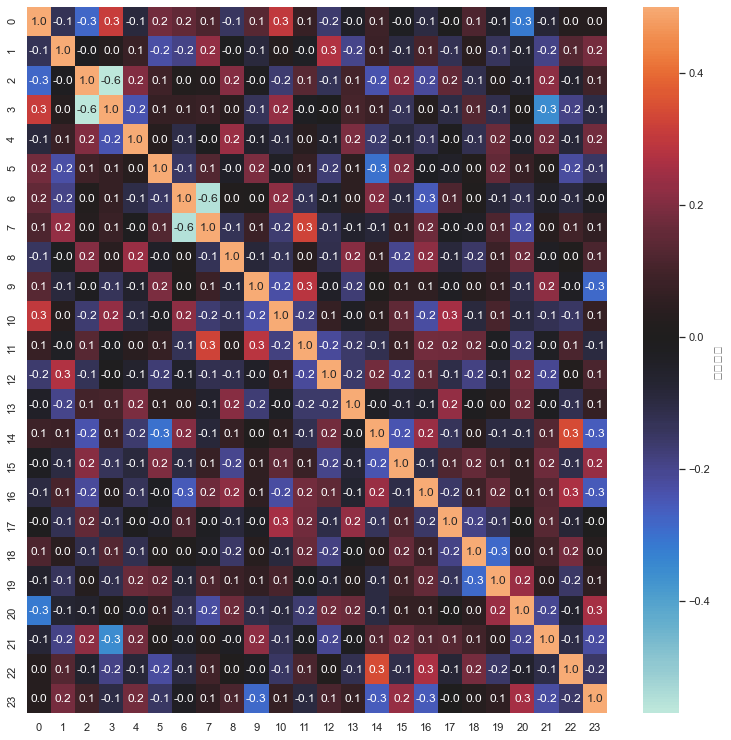

In [73]:
#乱数バージョンの相関係数ヒートマップ
#乱数を使っているので値が毎回少し変わる
array2 = []
hour_urine_cor2 = []

for key in hour_dic.keys():
    for key2 in hour_dic.keys():
        cor = np.corrcoef(df2[key], df2[key2])
        #print(key, "時と",  key2, "時の相関は", cor)
        array2.append(cor[0][1])
    hour_urine_cor2.append(array2)
    array2 = []
    
    
#hour_urine_cor2
bb = sns.heatmap(hour_urine_cor2, vmax = 0.5, annot=True, fmt="1.1f", center=0)
bb.collections[0].colorbar.set_label('相関係数')
japanize_matplotlib.japanize()
sns.set(rc = {'figure.figsize':(13,13)})


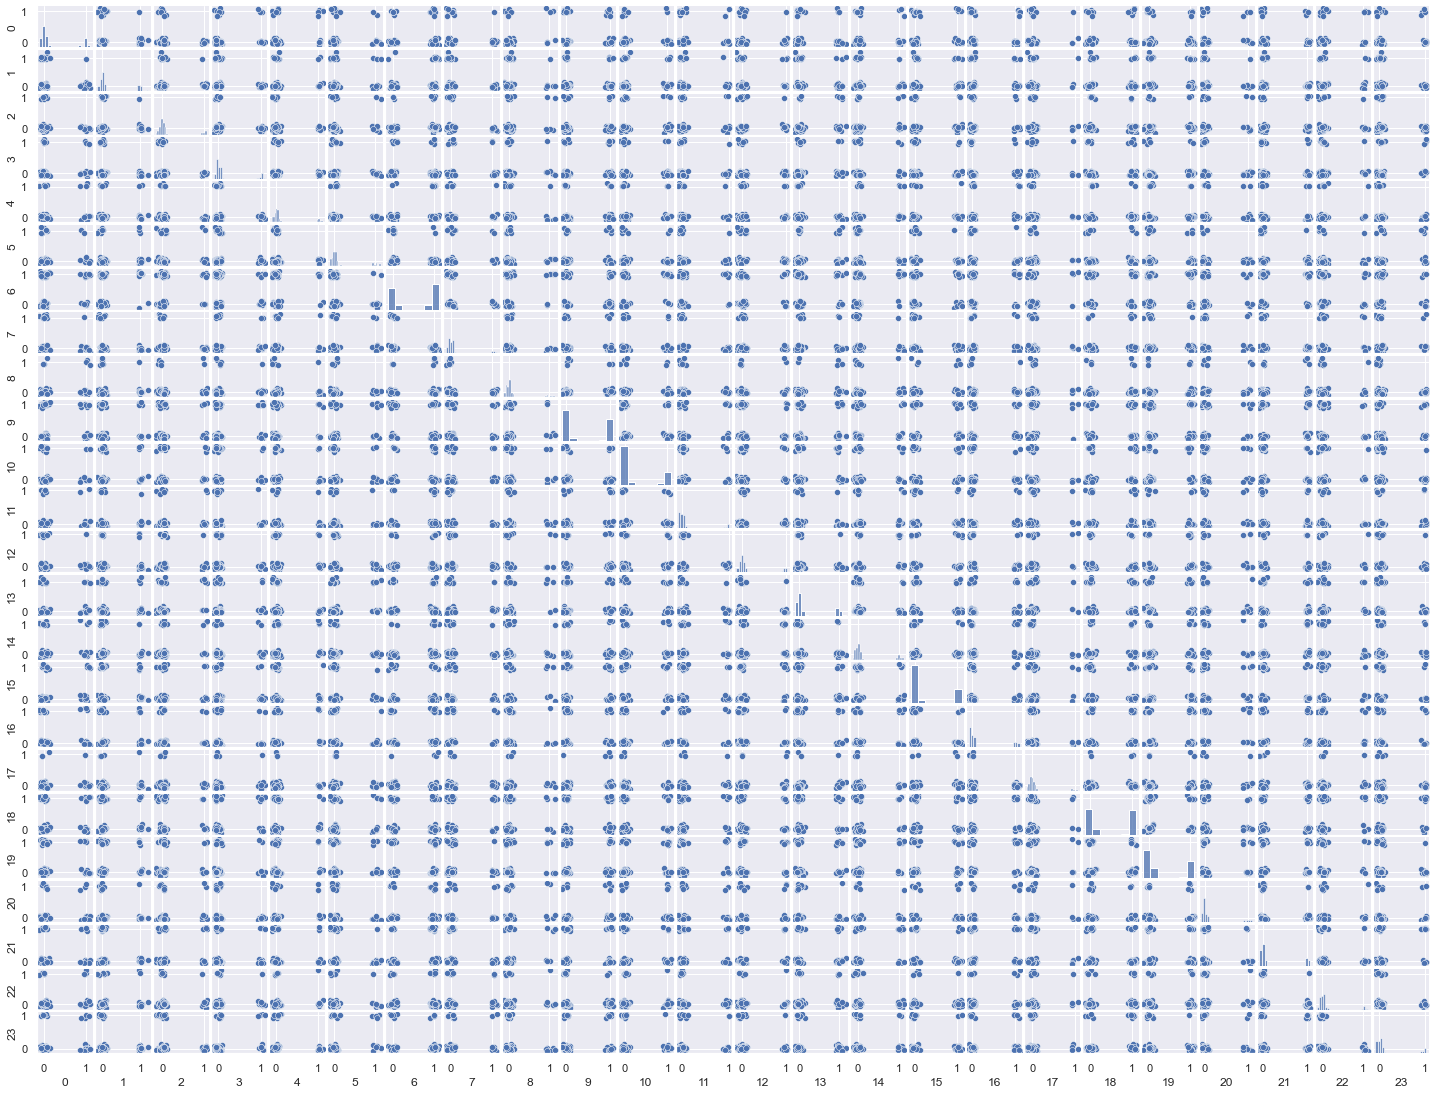

In [15]:
#乱数バージョンをプロットしたもの
time_plot = sns.pairplot(df2)
time_plot.fig.set_figheight(15)
time_plot.fig.set_figwidth(20)

In [15]:
#日付変更の基準を6時にする

def day_start(RECORD):
    
    day2 = []
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    min_colum_num = columns_num("min_day")
        
    for k in range(len(RECORD)):
        Start_time = RECORD.iloc[k,start_colum_num]
        if Start_time.hour < 6:
            day2.append((Start_time - dt.timedelta(days=1)).day )
        else:
            day2.append(Start_time.day)
    
    RECORD["day2"] = day2
    return RECORD

In [16]:
day_start(RECORD)

id date                     start                    finish                created_at                updated_at record_type value  user    act  target_id target_role  activity2user_id  \
26123  129764   01 2018-05-01 09:21:59+09:00 2018-05-01 09:22:00+09:00 2018-04-30 09:22:32+09:00 2018-04-30 09:22:32+09:00         排尿量    中量     8     排泄         38          ３階             39385   
26126  129775   01 2018-05-01 09:24:25+09:00 2018-05-01 09:25:31+09:00 2018-04-30 09:25:30+09:00 2018-04-30 09:25:30+09:00         排尿量    多量     8     排泄         40          ３階             39387   
26127  129776   01 2018-05-01 09:24:25+09:00 2018-05-01 09:25:31+09:00 2018-04-30 09:25:30+09:00 2018-04-30 09:25:30+09:00         排便量    多量     8     排泄         40          ３階             39387   
26131  129785   01 2018-05-01 09:26:02+09:00 2018-05-01 09:27:11+09:00 2018-04-30 09:26:44+09:00 2018-04-30 09:26:44+09:00         排尿量    多量     8     排泄         43          ３階             39388   
26134  129794   01 2018-05-01 09:28:19+09:00 2018-05-01 09:29:20+09:00 2018-04-30 09:29:19+09:00 2018-04-30 09:29:19+09:00         排尿量    中量     8     排泄         44          ３階             39390   
...       ...  ...                       ...                       ...                       ...                       ...         ...   ...   ...    ...        ...         ...               ...   
62410  432812   30 2018-07-01 08:38:33+09:00 2018-07-01 08:38:34+09:00 2018-06-29 08:47:53+09:00 2018-06-29 08:47:53+09:00         水分量   200    10  食事・服薬         61          ４階            109984   
62400  432800   30 2018-07-01 08:38:33+09:00 2018-07-01 08:38:34+09:00 2018-06-29 08:46:27+09:00 2018-06-29 08:46:27+09:00         水分量   200    10  食事・服薬         59          ４階            109982   
62398  432798   30 2018-07-01 08:38:33+09:00 2018-07-01 08:38:34+09:00 2018-06-29 08:46:13+09:00 2018-06-29 08:46:13+09:00     食事量(主食)    10    10  食事・服薬         59          ４階            109982   
62411  432813   30 2018-07-01 08:38:33+09:00 2018-07-01 08:38:34+09:00 2018-06-29 08:48:00+09:00 2018-06-29 08:48:00+09:00          服薬    介助    10  食事・服薬         61          ４階            109984   
62401  432801   30 2018-07-01 08:38:33+09:00 2018-07-01 08:38:34+09:00 2018-06-29 08:46:34+09:00 2018-06-29 08:46:34+09:00          服薬    介助    10  食事・服薬         59          ４階            109982   

       act_id  year month year-month-date  ID_act  ID_record_type  ID_value  ID_target_role  hour  min_day year-month-date-hour  ID_past_value  main_amount  sub_amount  excretion  water  is_morning  \
26123    9606  2018    05      2018-05-01       2              10        28               3     9      555        2018-05-01-09            -10          -10         -10        -10    -10       False   
26126    9608  2018    05      2018-05-01       2              10        37               3     9      555        2018-05-01-09            -10          -10         -10        -10    -10       False   
26127    9608  2018    05      2018-05-01       2              11        37               3     9      555        2018-05-01-09            -10          -10         -10        -10    -10       False   
26131    9609  2018    05      2018-05-01       2              10        37               3     9      555        2018-05-01-09            -10          -10         -10        -10    -10       False   
26134    9611  2018    05      2018-05-01       2              10        28               3     9      555        2018-05-01-09            -10          -10         -10        -10    -10       False   
...       ...   ...   ...             ...     ...             ...       ...             ...   ...      ...                  ...            ...          ...         ...        ...    ...         ...   
62410   44572  2018    06      2018-06-30       1               5        15               4     8      510        2018-06-30-08             12           11           1          1      3        True   
62400   44572  2018    06 

In [17]:
#排尿した期間urine_termをデータフレームに追加するメソッド
#day_startメソッドを使ってから
#DICOMOには載せていない
#6～7時:起床～朝食
#8時から10時:(value0以外の)食事レコードがあれば、朝食～昼食、無ければ起床～朝食
#11時:朝食～昼食
#12時から14時:(value0以外の)食事レコードがあれば、昼食～夕食、無ければ朝食～昼食
#15～17時:昼食～夕食
#18時から20時:(value0以外の)食事レコードがあれば、夕食～就寝、無ければ昼食～夕食
#20～22時:夕食～就寝
#以降6時まで:夕食～就寝


def urine_term(RECORD):
    RECORD = RECORD[RECORD['record_type'].isin(['排尿量','食事量(主食)'])]
    urine_term = []
    flag = 0
    
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    day2_colum_num = columns_num("day2")
    Record_type = columns_num("record_type")
    
    
    
    Target_id = []
    Target_id = [RECORD['target_id']]
    Target_id = set(Target_id[0])
    Target_id = list(Target_id)
    Target_id.sort()
    
    for ID in Target_id:
        RECORD_target = RECORD[RECORD['target_id'].isin([ID])]
        day = RECORD_target.iloc[0, day2_colum_num]
        for k in range(len(RECORD_target)):
            Record = RECORD_target.iloc[k, Record_type]
            Value = RECORD_target.iloc[k, value_colum_num]
            Start_time = RECORD_target.iloc[k,start_colum_num]
            #ここから
            if day != RECORD_target.iloc[k, day2_colum_num]:
                flag = 0
            if Record == "食事量(主食)" and Value != "0" and Start_time.hour !=15 and Start_time.hour !=16:
                flag = flag + 1
                #print(flag)
            if Record == "排尿量":
                if Start_time.hour >= 6 and Start_time.hour <= 7:
                    urine_term.append("起床～朝食")
                elif Start_time.hour >= 8 and Start_time.hour <= 10 and flag == 1:
                    urine_term.append("朝食～昼食")
                elif Start_time.hour >= 8 and Start_time.hour <= 10 and flag != 1:
                    urine_term.append("起床～朝食")
                elif Start_time.hour == 11:
                    urine_term.append("朝食～昼食")
                elif Start_time.hour >= 12 and Start_time.hour <= 14 and flag != 2:
                    urine_term.append("朝食～昼食")
                elif Start_time.hour >= 12 and Start_time.hour <= 14 and flag == 2:
                    urine_term.append("昼食～夕食")
                elif Start_time.hour >= 15 and Start_time.hour <= 17:
                    urine_term.append("昼食～夕食")
                elif Start_time.hour >= 18 and Start_time.hour <= 20 and flag != 3:
                    urine_term.append("昼食～夕食")
                elif Start_time.hour >= 18 and Start_time.hour <= 20 and flag == 3:
                    urine_term.append("夕食～就寝")
                elif Start_time.hour >= 21 and Start_time.hour <= 22:
                    urine_term.append("夕食～就寝")
                else:
                    urine_term.append("就寝～起床")
                
            day = RECORD_target.iloc[k, day2_colum_num]
        
    
    RECORD_urine = RECORD[RECORD['record_type'].isin(['排尿量'])]
    RECORD_urine = RECORD_urine.sort_values(by=['target_id',"start"]) 
    RECORD_urine["urine_term"] = urine_term
    return RECORD_urine
    
   


In [19]:
RECORD_urine = urine_term(RECORD)
#RECORD_urine

In [22]:
#レコードの起こった時間(開始)時間帯を棒グラフとして出力する
#urine_termメソッドの返り値データフレームを使う

def day_urine_bar(RECORD, target):
    RECORD = RECORD[RECORD['record_type'].isin(['排尿量','食事量(主食)'])]
    RECORD = RECORD[RECORD['target_id'].isin(target)]
    
    daydict = {"起床～朝食":0, "朝食～昼食":0, "昼食～夕食":0, "夕食～就寝":0, "就寝～起床":0}
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    min_colum_num = columns_num("min_day")
    urine_term_num = columns_num("urine_term")
    
    flag1 = 0
    flag2 = 0
    flag3 = 0
    flag4 = 0
    flag5 = 0
    
    day = []
    day = [RECORD["day2"]]
    day = set(day[0])
    day = list(day)
    
    day_count = RECORD["year-month-date"].unique()
    
    daydict["起床～朝食"] = len(day_count)
    daydict["朝食～昼食"] = len(day_count)
    daydict["昼食～夕食"] = len(day_count)
    daydict["夕食～就寝"] = len(day_count)
    daydict["就寝～起床"] = len(day_count)
    
    for d in day:
        RECORD_day2 = RECORD[RECORD['day2'].isin([d])]
        for urine in daydict:
              if not urine in RECORD_day2.values:
                    daydict[urine] = daydict[urine] - 1
    plt.bar(list(daydict.keys()),list(daydict.values()))
    plt.xlabel('排尿のタイミング',fontname="Meiryo", fontsize=18)
    plt.ylabel('回数',fontname="Meiryo", fontsize=18)
    plt.ylim(0,len(day_count))
    plt.title('1日の排尿タイミング分布',fontname="Meiryo", fontsize=18)

In [31]:
day_urine_bar(RECORD_urine, [35])

# 仮説2:排泄前後の習慣

In [23]:
#ご飯の時間を記載
def meal_time(RECORD):
    start_colum_num = columns_num("start")
    hour_colum_num = columns_num("hour")
    record_type_colum_num = columns_num("record_type")
    for k in range(len(RECORD)):
        if RECORD.iloc[k, record_type_colum_num] == "食事量(主食)" and 5 <=RECORD.iloc[k, hour_colum_num] <= 10:
            RECORD.iloc[k, record_type_colum_num] = "朝食"
        elif RECORD.iloc[k, record_type_colum_num] == "食事量(主食)" and 11 <=RECORD.iloc[k, hour_colum_num] <= 16:
            RECORD.iloc[k, record_type_colum_num] = "昼食"
        elif RECORD.iloc[k, record_type_colum_num] == "食事量(主食)" and 17 <=RECORD.iloc[k, hour_colum_num] <= 24:
            RECORD.iloc[k, record_type_colum_num] = "夜食"
        elif RECORD.iloc[k, record_type_colum_num] == "食事量(主食)" and 1 <=RECORD.iloc[k, hour_colum_num] <= 4:
            RECORD.iloc[k, record_type_colum_num] = "夜食"
    return RECORD

In [24]:
RECORD_meal = meal_time(RECORD)

In [25]:
#target_idは一人一人にしないとバグる
#DICOMOには載せていない
#事前にmeal_timeを実行する
def excretion_event(RECORD, target):
    RECORD = RECORD[RECORD['target_id'].isin(target)]
    
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    record_type_colum_num = columns_num("record_type")
    
    #データフレームの特定の行の要素を配列として出力する
    record_type_array = []
    record_type_array = [RECORD['record_type']]
    record_type_array = set(record_type_array[0])
    record_type_array = list(record_type_array)
    record_type_dic_past = {}
    record_type_dic_future = {}
    record_type_variety = {}
    
    record_variety = set(RECORD['record_type'])
    record_variety = list(record_variety)
    record_variety
    
    record_type_past_ratio = {}
    record_type_future_ratio = {}
    
    for i in record_variety:
        variety_DF = RECORD[RECORD['record_type'].isin([i])]
        record_type_variety[i] = len(variety_DF)
        
    
        
    for i in range(len(record_type_array)):
        record_type_dic_past[record_type_array[i]] = 0
        record_type_dic_future[record_type_array[i]] = 0
    
    excretion = RECORD[RECORD['record_type'].isin(['排尿量'])]
    
    for k in range(len(excretion)):
        start_time = excretion.iloc[k, start_colum_num]
        
        past_Time = start_time - dt.timedelta(hours = 1)
        past_Data = RECORD[RECORD['start'] < start_time]
        past_Data = past_Data[past_Data['start'] > past_Time]
        
        if len(past_Data) == 0:
            continue
        else:
            for m in range(len(past_Data)):
                record_type = past_Data.iloc[m, record_type_colum_num]
                record_type_dic_past[record_type] = record_type_dic_past[record_type] + 1
       
            
    for k in range(len(excretion)):
        start_time = excretion.iloc[k, start_colum_num]
            
        future_Time = start_time + dt.timedelta(hours = 1)
        future_Data = RECORD[RECORD['start'] > start_time]
        future_Data = future_Data[future_Data['start'] < future_Time]
            
            
        if len(future_Data) == 0:
            continue
        else:
            for n in range(len(future_Data)):
                record_type = future_Data.iloc[n, record_type_colum_num]
                record_type_dic_future[record_type] = record_type_dic_future[record_type] + 1
            
    for i in record_variety:
        record_type_past_ratio[i] = record_type_dic_past[i] / record_type_variety[i]
        record_type_past_ratio[i] = record_type_past_ratio[i] * 100
        
        record_type_future_ratio[i] = record_type_dic_future[i] / record_type_variety[i]
        record_type_future_ratio[i] = record_type_future_ratio[i] * 100
    
    
    print("過去に", record_type_dic_past)
    print("未来に", record_type_dic_future)
    print(record_type_variety)
    
    
    sns.set()
    sns.set_style('whitegrid')
    sns.set_palette('Paired')
 
    #グラフのx軸とy軸を辞書から作成
    sum_record = record_type_variety.items()
    sum_record= sorted(sum_record)
    x0, y0 = zip(*sum_record)
    
    past= record_type_dic_past.items()
    past = sorted(past)
    x1, y1 = zip(*past)
    
    future = record_type_dic_future.items()
    future= sorted(future)
    x2, y2 = zip(*future)
    
    plt.rcParams['font.family'] = 'MS Mincho'
    plt.rcParams["figure.figsize"] = (30,15)
    
    
    plt.bar(x0, y0, color='b', width=1.0, label='全レコード', alpha=0.5, align="center")
    plt.bar(x1, y1, color='g', width=1.0, label='排尿"前"1時間に該当したレコード', alpha=0.5, align="center")
    plt.legend(fontsize=18) # ラベル表示
    
    plt.xlabel('介護記録の種類', fontname="Meiryo", fontsize=24)
    plt.ylabel('回数', fontname="Meiryo", fontsize=24)
    plt.title('排尿の過去1時間の行動回数' ,fontname="Meiryo", fontsize=24)
    plt.tick_params(labelsize=24)
    plt.show()
    
    plt.bar(x0, y0, color='b', width=1.0, label='全レコード', alpha=0.5, align="center")
    plt.bar(x2, y2, color='g', width=1.0, label='排尿"後"1時間に該当したレコード', alpha=0.5, align="center")
    plt.legend(fontsize=18) # ラベル表示
    
   
    plt.xlabel('介護記録の種類', fontname="Meiryo", fontsize=24)
    plt.ylabel('回数', fontname="Meiryo", fontsize=24)
    plt.title('排尿の未来1時間の行動' ,fontname="Meiryo", fontsize=24)
    plt.tick_params(labelsize=18)
    
    plt.show()
    return record_type_dic_past, record_type_dic_future, record_type_past_ratio, record_type_future_ratio

過去に {'水分量': 49, '昼食': 13, '服薬': 40, '活力朝礼': 8, '排尿量': 8, '夜食': 20, '目的': 1, '入浴方法': 6, '朝食': 16, '種別': 90, '対応内容': 76, '排便量': 1, '更衣介助': 4, 'ラジオ体操': 8, '外出場所': 2}
未来に {'水分量': 40, '昼食': 11, '服薬': 32, '活力朝礼': 5, '排尿量': 8, '夜食': 14, '目的': 3, '入浴方法': 0, '朝食': 15, '種別': 113, '対応内容': 97, '排便量': 2, '更衣介助': 16, 'ラジオ体操': 5, '外出場所': 1}
{'水分量': 204, '昼食': 71, '服薬': 175, '活力朝礼': 22, '排尿量': 340, '夜食': 69, '目的': 8, '入浴方法': 17, '朝食': 64, '種別': 331, '対応内容': 269, '排便量': 56, '更衣介助': 23, 'ラジオ体操': 22, '外出場所': 19}


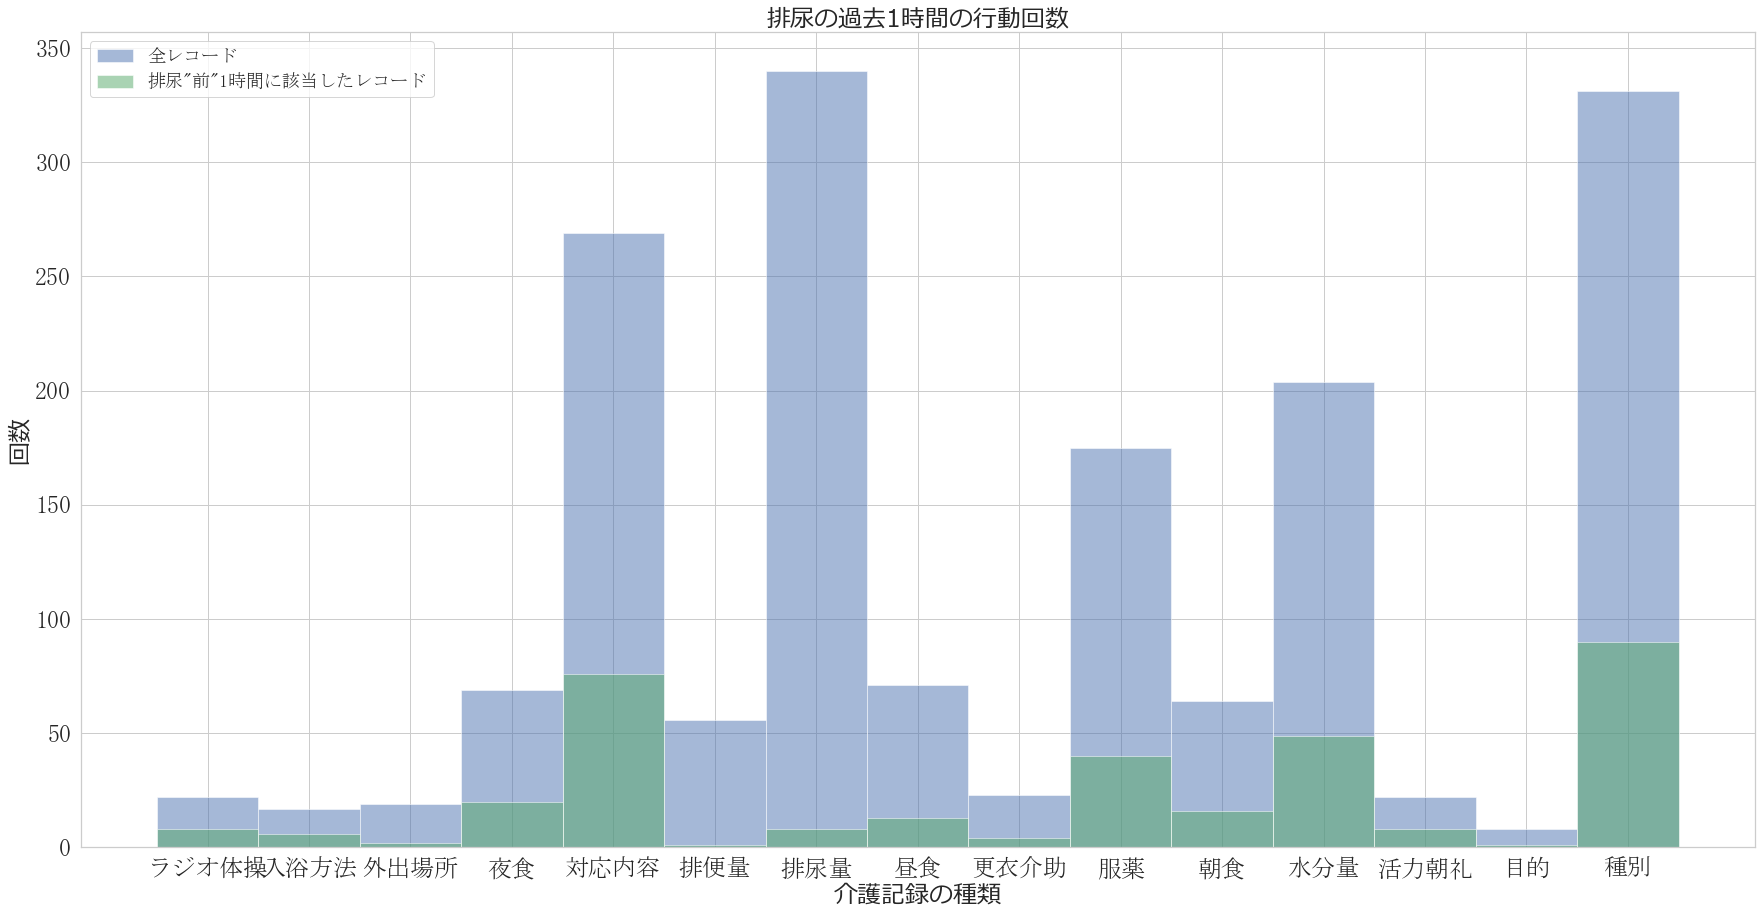

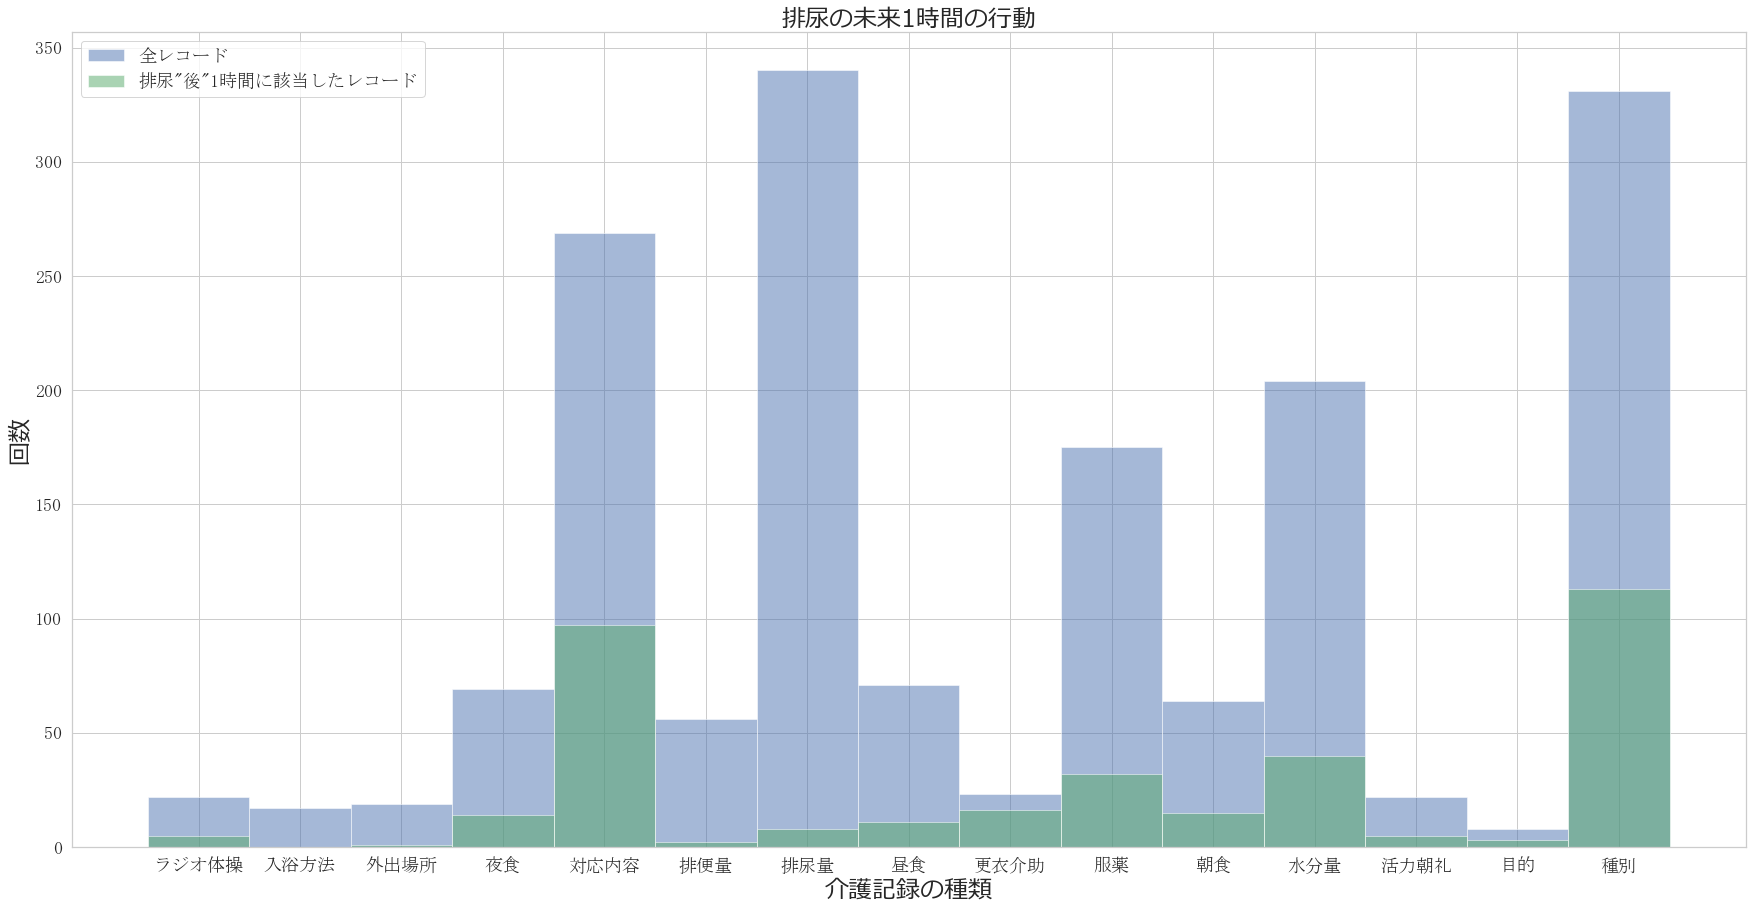

In [124]:
record_type_dic_past, record_type_dic_future, record_type_past_ratio, record_type_future_ratio = excretion_event(RECORD_meal, [29])

In [27]:
#target_idは一人一人にしないとバグる
#とあるレコードType_recordと前後時間Time_Windowが被っていない行動を抜き出す
def excretion_event_non(RECORD, target, type_record, time_window = 1):
    RECORD = RECORD[RECORD['target_id'].isin(target)]
    RECORD_urine = RECORD[RECORD["record_type"].isin(type_record)]
    RECORD_Nonurine = record_drop(RECORD, ['排尿量'])
    
    
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    record_type_colum_num = columns_num("record_type")
    
    #データフレームの特定の行の要素を配列として出力する
    record_type_array = []
    record_type_array = [RECORD['record_type']]
    record_type_array = set(record_type_array[0])
    record_type_array = list(record_type_array)
    type_dic_nonurine = {}
    record_type_variety = {}
    
    nonurine_ratio = {}
    
    record_variety = set(RECORD['record_type'])
    record_variety = list(record_variety)
    record_variety
    
    for i in record_variety:
        variety_DF = RECORD[RECORD['record_type'].isin([i])]
        record_type_variety[i] = len(variety_DF)
        type_dic_nonurine[i] = len(variety_DF)
    
    for k in range(len(RECORD_Nonurine)):
        start_time = RECORD_Nonurine.iloc[k, start_colum_num]
        record_type_now = RECORD_Nonurine.iloc[k, record_type_colum_num]
        
        past_Time = start_time - dt.timedelta(hours = time_window)
        future_Time = start_time + dt.timedelta(hours = time_window)
        RECORD_urine_time = RECORD_urine[RECORD_urine['start'] > past_Time]
        RECORD_urine_time = RECORD_urine_time[RECORD_urine_time['start'] < future_Time]
        
        if len(RECORD_urine_time) != 0:
            type_dic_nonurine[record_type_now] = type_dic_nonurine[record_type_now] - 1
        
    print(type_record, "が入っていないのは" ,type_dic_nonurine)
    print("全体のレコード数は" ,record_type_variety)
    
    for i in record_variety:
        nonurine_ratio[i] = type_dic_nonurine[i] / record_type_variety[i]
        nonurine_ratio[i] = nonurine_ratio[i] * 100
    print(type_record, "が入っていない割合は" ,nonurine_ratio)
    
    return type_dic_nonurine, record_type_variety, nonurine_ratio
    

In [125]:
type_dic_nonurine, record_type_variety, nonurine_ratio = excretion_event_non(RECORD, [29], ["排尿量"], time_window = 1)

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


['排尿量'] が入っていないのは {'水分量': 122, '昼食': 48, '服薬': 107, '活力朝礼': 11, '排尿量': 340, '夜食': 39, '目的': 4, '入浴方法': 11, '朝食': 35, '種別': 132, '対応内容': 99, '排便量': 2, '更衣介助': 4, 'ラジオ体操': 11, '外出場所': 16}
全体のレコード数は {'水分量': 204, '昼食': 71, '服薬': 175, '活力朝礼': 22, '排尿量': 340, '夜食': 69, '目的': 8, '入浴方法': 17, '朝食': 64, '種別': 331, '対応内容': 269, '排便量': 56, '更衣介助': 23, 'ラジオ体操': 22, '外出場所': 19}
['排尿量'] が入っていない割合は {'水分量': 59.80392156862745, '昼食': 67.6056338028169, '服薬': 61.142857142857146, '活力朝礼': 50.0, '排尿量': 100.0, '夜食': 56.52173913043478, '目的': 50.0, '入浴方法': 64.70588235294117, '朝食': 54.6875, '種別': 39.87915407854985, '対応内容': 36.80297397769517, '排便量': 3.571428571428571, '更衣介助': 17.391304347826086, 'ラジオ体操': 50.0, '外出場所': 84.21052631578947}


水分量  昼食   服薬  活力朝礼  排尿量  夜食  目的  入浴方法  朝食   種別  対応内容  排便量  更衣介助  ラジオ体操  外出場所
対象者の全レコード数  204  71  175    22  340  69   8    17  64  331   269   56    23     22    19

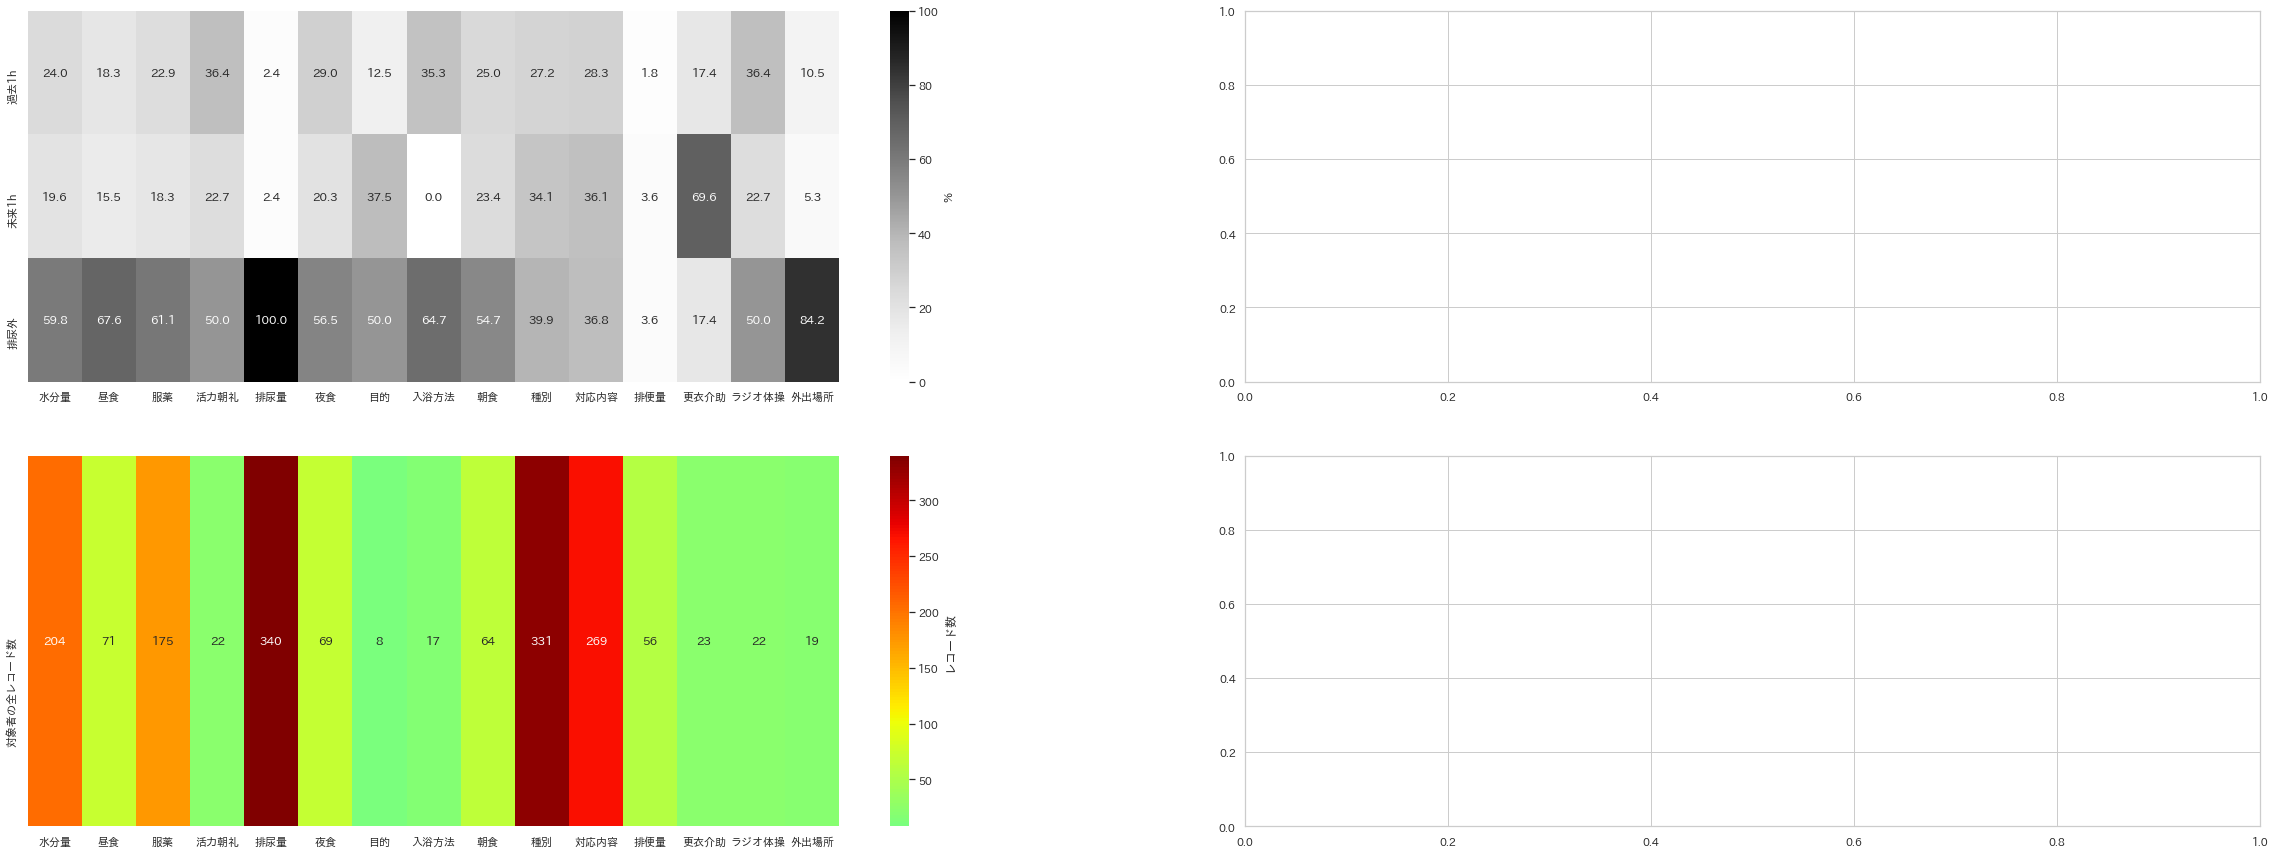

In [135]:
type_event = []
all_event = []
type_event.append(record_type_past_ratio.values())
type_event.append(record_type_future_ratio.values())
type_event.append(nonurine_ratio.values())
all_event.append(record_type_variety.values())


type_event_df = pd.DataFrame(data=type_event, index=['過去1h', '未来1h', '排尿外'], columns=record_type_variety.keys())
all_event_df = pd.DataFrame(data=all_event, index=['対象者の全レコード数'], columns=record_type_variety.keys())


if "食事量(主食)" in all_event_df.columns:
    type_event_df = type_event_df.drop("食事量(主食)", axis = 1)
    all_event_df = all_event_df.drop("食事量(主食)", axis = 1)
all_event_df
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 15))

ww = sns.heatmap(type_event_df,cmap='Greys', annot=True, fmt="1.1f", ax = axes[0,0])
ww.collections[0].colorbar.set_label('%')
japanize_matplotlib.japanize()
aa = sns.heatmap(all_event_df,cmap='jet', annot=True,fmt=".3g", center=10, ax = axes[1,0])
aa.collections[0].colorbar.set_label('レコード数')

In [142]:
type_dic_nonurine.values()
record_type_variety.values()
type_dic_nonurine.values() + record_type_variety.values()

dict_values([1, 37, 0, 7, 136, 274, 2, 18, 29, 0, 157, 55, 12, 18, 2, 121, 10, 1, 0, 100])

dict_values([1, 50, 1, 83, 241, 274, 3, 25, 49, 1, 292, 74, 14, 26, 2, 174, 14, 2, 1, 149])

TypeError: unsupported operand type(s) for +: 'dict_values' and 'dict_values'

# 仮説3:排尿回数と水分量の関係

In [1]:
def Water_Urine_mean(RECORD, target_id):  
    RECORD = RECORD[RECORD['target_id'].isin([target_id])]
    RECORD_water = RECORD[RECORD['record_type'].isin(['水分量'])]
    RECORD_urine = RECORD[RECORD['record_type'].isin(['排尿量'])]
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    record_type_colum_num = columns_num("record_type")
    
    #データフレームの特定の行の要素を配列として出力する
    Target_array = []
    Target_array = [RECORD["target_id"]]
    Target_array = set(Target_array[0])
    Target_array = list(Target_array)
    Target_water_dic = {}
    Target_urine_dic = {}
    
    for i in range(len(Target_array)):
        Target_water_dic[Target_array[i]] = 0
        Target_urine_dic[Target_array[i]] = 0
       
        
    for k in Target_array:
        RECORD_water_target = RECORD_water[RECORD_water["target_id"].isin([k])]
        RECORD_urine_target = RECORD_urine[RECORD_urine["target_id"].isin([k])]
        
        Target_urine_dic[k] = len(RECORD_urine_target)/ 62
        
        for i in range(len(RECORD_water_target)):
            drink = int(RECORD_water_target.iloc[i,value_colum_num])
            Target_water_dic[k] = Target_water_dic[k] + drink
            #water[Target_id]には'target_id'ごとの水分量の合計が入っている
        Target_water_dic[k] = Target_water_dic[k] / 62
    
    print(Target_water_dic)
    print(Target_urine_dic)
    return Target_water_dic[target_id], Target_urine_dic[target_id]
    
    

In [2]:
#水分量の平均を求めるメソッド'排尿量'
#日付は合計で62日間
def WaterValue_UrineTime_day(RECORD, target_id, Target_water, Target_urine):  
    RECORD = RECORD[RECORD['target_id'].isin(target_id)]
    RECORD_water = RECORD[RECORD['record_type'].isin(['水分量'])]
    RECORD_urine = RECORD[RECORD['record_type'].isin(['排尿量'])]
    
    a = []
    b = []
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    record_type_colum_num = columns_num("record_type")
    
    #データフレームの特定の行の要素を配列として出力する
    date_array = []
    date_array = [RECORD["year-month-date"]]
    date_array = set(date_array[0])
    date_array = list(date_array)
    date_array.sort()
    date_water_dic = {}
    date_urine_dic = {}

    
    for i in range(len(date_array)):
        date_water_dic[date_array[i]] = 0
        date_urine_dic[date_array[i]] = 0
       
    for k in date_array:
        RECORD_urine_day = RECORD_urine[RECORD_urine["year-month-date"].isin([k])]
        RECORD_water_day = RECORD_water[RECORD_water["year-month-date"].isin([k])]
        date_urine_dic[k] = len(RECORD_urine_day)
        
        
        for j in range(len(RECORD_water_day)):
            date_water_dic[k] = date_water_dic[k] + int(RECORD_water_day.iloc[j,value_colum_num])
    
    #辞書のキー名を変更
    count = 1
    for i in date_array:
        date_water_dic[count] = date_water_dic[i]
        date_urine_dic[count] = date_urine_dic[i]
        del date_water_dic[i]
        del date_urine_dic[i]
        a.append(Target_water)
        b.append(Target_urine)
        count += 1
        
    sns.set()
    sns.set_style('whitegrid')
    sns.set_palette('Paired')
     
        
    print("各日にちの水分摂取量と排尿回数")
    #グラフのx軸とy軸を辞書から作成
    date_water = date_water_dic.items()
    date_water = sorted(date_water)
    x0, y0 = zip(*date_water)
    
    date_urine = date_urine_dic.items()
    date_urine = sorted(date_urine)
    x1, y1 = zip(*date_urine)
    
    
    plt.rcParams['font.family'] = 'MS Mincho'
    #plt.rcParams["figure.figsize"] = (10,5)
    
    fig = plt.figure(figsize=(20, 15))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.bar(x0, y0, color='b', width=1.0, label='全レコード', alpha=0.5, align="center")
    ax1.plot(x0, a, color = 'red', marker = 'o')
    plt.xlabel('日にち', fontname="Meiryo", fontsize=24)
    plt.ylabel('水分量', fontname="Meiryo", fontsize=24)
    plt.tick_params(labelsize=24)
    
    
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.bar(x1, y1, color='g', width=1.0, label='排尿後2時間に該当したレコード', alpha=0.5, align="center")
    ax2.plot(x0, b, color = 'red', marker = 'o')
    plt.xlabel('日にち', fontname="Meiryo", fontsize=24)
    plt.ylabel('排尿回数', fontname="Meiryo", fontsize=24)
    plt.tick_params(labelsize=24)
    
    fig.tight_layout()
    fig.show()
    
    print(a)
    print(date_water_dic)
    print(date_urine_dic)
    print(len(date_array))
    print(date_array)

{35: 529.0322580645161}
{35: 4.419354838709677}
各日にちの水分摂取量と排尿回数


<ipython-input-2-1eca86ce5ce9>:86: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580645161, 529.0322580

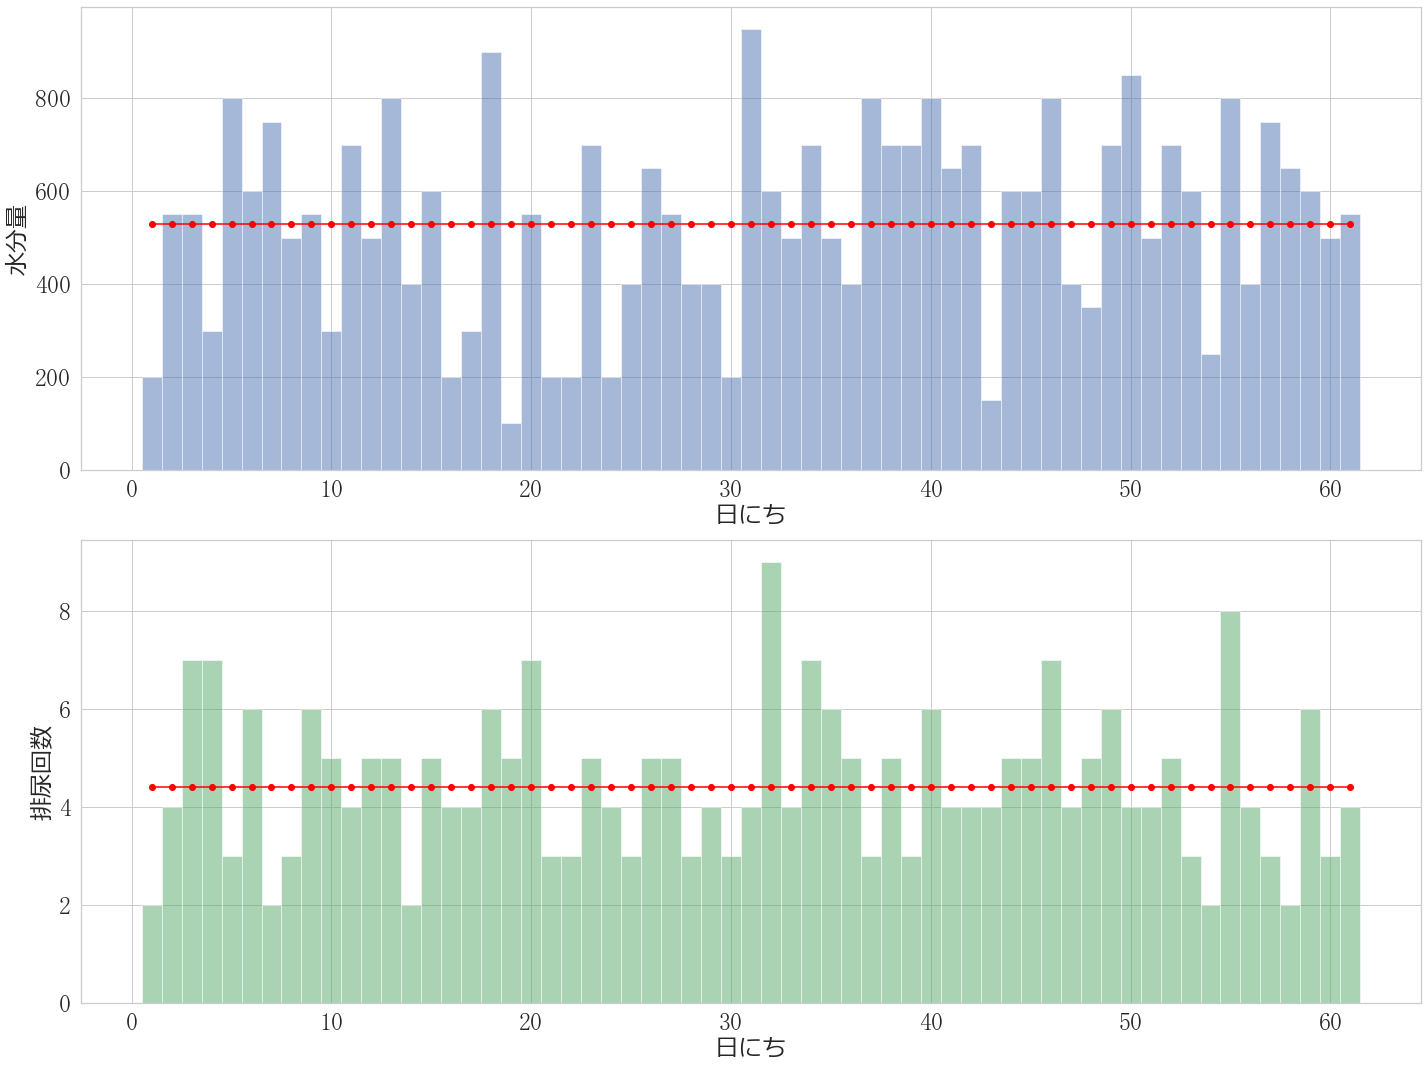

In [17]:
Target_water, Target_urine = Water_Urine_mean(RECORD, 35)
WaterValue_UrineTime_day(RECORD, [35], Target_water, Target_urine)
print(Target_water)
print(Target_urine)

In [18]:
id = []
id = [RECORD['target_id']]
id = set(id[0])
id = list(id)
Target_id_time = {}
        
for i in range(len(id)):
    Target_id_time[id[i]] = 0

Target_id_time

{35: 0,
 36: 0,
 38: 0,
 40: 0,
 43: 0,
 44: 0,
 45: 0,
 48: 0,
 29: 0,
 53: 0,
 59: 0,
 61: 0,
 31: 0}

In [ ]:
#レコードの起こった時間(開始)時間帯を棒グラフとして出力する
#

def hour_bar(RECORD, record_type, target):
    RECORD = RECORD[RECORD['record_type'] == record_type]
    RECORD = RECORD[RECORD['target_id'].isin(target)]
    hour = RECORD['hour']
    hour = hour.values
    
    count = []
    hour_time = []
    for i in range(1,48):
        count.append(0) 
        hour_time.append(i)
    
    for i in hour:
        count[i] = count[i] + 1
    plt.bar(hour_time,count)

In [23]:
#排尿量のための特徴量
list_features = [
#     'ID_act', 'ID_record_type',
    #'target_id',
    #'ID_target_role',
    #'user',
    'hour',
    #'min_day',
    #'week_day',
    #'ID_past_value',

    'past_water_hour',
    'past_urination_hour'
    
]

target = 'future_urination_hour'

In [ ]:
#排便量のための特徴量
list_features = [
#     'ID_act', 'ID_record_type',
    #'target_id',
    #'ID_target_role',
    #'user',
    'hour',
    #'min_day',
    #'week_day',
    #'ID_past_value',  
    'past_meal_hour',
    'past_excretion_hour'
    
]

target = 'future_excretion_hour'

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           1       0.26      0.35      0.30        71
           2       0.28      0.33      0.30        91
           3       0.22      0.17      0.19       105
           4       0.17      0.17      0.17        40
           5       0.24      0.14      0.18        28
           6       0.09      0.14      0.11        58
          12       0.00      0.00      0.00        46

    accuracy                           0.21       439
   macro avg       0.18      0.19      0.18       439
weighted avg       0.19      0.21      0.20       439

score :  21 %( 0.20956719817767655 )


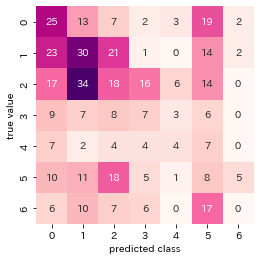

In [24]:
#現状使っているのはこれ
#最初の行の引数が使うデータフレームになっているか確認
#
train_data, test_data = tr.getDataSplitByPeriod(excretion)

## 学習
clf_temp1,y_predict = train(train_data[list_features], test_data[list_features], train_data[target], test_data[target])
X_test_temp = test_data[list_features]
Y_test_temp = test_data[target]

# 推定
Y_predict = clf_temp1.predict(X_test_temp)

# 再現率・適合率・F１値
f1 = classification_report(Y_test_temp, Y_predict, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(f1)

score = accuracy_score(Y_test_temp, Y_predict)
print("score : ", int(((score*100)+0.5)), "%(", score,")")

## ハイパーパラメータの自動最適化
# import optuna
# study = optuna.create_study()
# study.optimize(objective, n_trials = 100)
# study.best_params

# ここから斎藤先生ランダムフォレスト

In [17]:
excretion = RECORD[RECORD['record_type'].isin(["対応内容", "水分量", '排尿量', "食事量(主食)", "処置内容", "口腔内清掃",  "入浴方法", "排便量"])]

In [18]:
excretion = excretion[excretion['target_id'].isin([29,31,35,36,38,40,43,44,45,48,53,59,61])]

In [8]:
#前回のレコードからどのくらいの時間が経っているかの配列を作る関数
#引数は(データフレーム、知りたいレコード、配列名)
#過去の排尿量・排便量の時間を知るようのメソッド
def past_hour(RECORD, a, b, c):
    
    
    flag = [] #bの時間以内に介護レコードがあるかどうか
    Bath_Time = []
    Drink_Time = []
    Amount_Water = []
    Meal_Time = []
    Urine_Time = []
    Def_Time = []
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    
    
    id = []
    id = [RECORD['target_id']]
    id = set(id[0])
    id = list(id)
    Target_id_time = {}
        
    for i in range(len(id)):
        Target_id_time[id[i]] = 0
        
    for k in range(len(RECORD)):
        sum_water = 0
        
        Target_id = RECORD.iloc[k,Target_colum_num]
        RECORD_id = RECORD[RECORD['target_id'].isin([Target_id])]
        
        
        Target_id_time[Target_id] = Target_id_time[Target_id] + 1
        
        
        start_time = RECORD.iloc[k,start_colum_num]
        Consider_Time = start_time - dt.timedelta(hours = b)
        past_Data = RECORD_id[RECORD_id['start'] < start_time]
        Consider_Data = past_Data[past_Data['start'] > Consider_Time]
        
        if len(Consider_Data) == 0 or Target_id_time[Target_id] == 1:
            flag.append(False)
            Bath_Time.append(0)
            Drink_Time.append(0)
            Amount_Water.append(0)
            Meal_Time.append(0)
            Urine_Time.append(0)
            Def_Time.append(0)
            
        else:
            flag.append(True)
            s_bool = Consider_Data['record_type'] == "入浴方法"
            Bath_Time.append(s_bool.sum())
            s_bool = Consider_Data['record_type'] == "食事量(主食)"
            Meal_Time.append(s_bool.sum())
            s_bool = Consider_Data['record_type'] == "排尿量"
            Urine_Time.append(s_bool.sum())
            s_bool = Consider_Data['record_type'] == "排便量"
            Def_Time.append(s_bool.sum())
            
            
            RECORD_id_water = Consider_Data[Consider_Data['record_type'].isin(["水分量"])]
            Drink_Time.append(len(RECORD_id_water))
                                                                     
            for j in range(len(RECORD_id_water)):
                sum_water = sum_water + int(RECORD_id_water.iloc[j,value_colum_num])
            Amount_Water.append(sum_water)
            
     
    RECORD["feature_flag"] = flag
    RECORD["Bath_Time"] = Bath_Time
    RECORD["Drink_Time"] = Drink_Time
    RECORD["Amount_Water"] = Amount_Water
    RECORD["Meal_Time"] = Meal_Time
    RECORD["Urine_Time"] = Urine_Time
    RECORD["Def_Time"] = Def_Time
    

In [9]:
past_hour(excretion, 0, 2, 0)

In [10]:
#前回のレコードからどのくらいの時間が経っているかの配列を作る関数
#引数は(データフレーム、知りたいレコード、配列名)
#過去の排尿量・排便量の時間を知るようのメソッド
def urine_nonurine(RECORD):
    
    
    urine_nonurine = [] 
    
    record_colum_num = columns_num('future_urination_hour')
    
    for k in range(len(RECORD)):
        if  RECORD.iloc[k,record_colum_num] < 3:
            urine_nonurine.append(1)
        else:
            urine_nonurine.append(0)
    
    RECORD["urine_nonurine"] = urine_nonurine
 


In [11]:
urine_nonurine(excretion)

In [12]:
#前回のレコードからどのくらいの時間が経っているかの配列を作る関数
#引数は(データフレーム、知りたいレコード、配列名)
#未来3時間以内に排便があったかどうかを知るようのメソッド
def def_nondef(RECORD):
    
    
    def_nondef = [] 
    
    record_colum_num = columns_num('future_excretion_hour')
    
    for k in range(len(RECORD)):
        if  RECORD.iloc[k,record_colum_num] < 3:
            def_nondef.append(1)
        else:
            def_nondef.append(0)
    
    RECORD["def_nondef"] = def_nondef
 


In [13]:
def_nondef(excretion)

In [16]:
#排尿量のための特徴量
list_features = [
#     'ID_act', 'ID_record_type',
    #'target_id',
    #'ID_target_role',
    #'user',
    #'hour',
    'min_day',
    #'week_day',
    #'ID_past_value',
    "Bath_Time",
    "Drink_Time",
    "Amount_Water",
    "Meal_Time",
    "Urine_Time",
    "Def_Time"
    
    
]

target = 'urine_nonurine'

In [ ]:
#排便量のための特徴量
list_features = [
#     'ID_act', 'ID_record_type',
    #'target_id',
    #'ID_target_role',
    #'user',
    'hour',
    #'min_day',
    #'week_day',
    #'ID_past_value',  
    'past_meal_hour',
    'past_excretion_hour',
    "Meal_Time"
    
]

target = 'future_excretion_hour'

In [33]:
uri_data = excretion[excretion["feature_flag"] ==True]

In [40]:
def confusionmatrix(y_test, y_predict):
    mat = confusion_matrix(y_test, y_predict)
    sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
    plt.xlabel('predicted class')
    plt.ylabel('true value')

Cross Validation ( Iter = 4 )
-> Train data size : 503
-> Test data size  : 168
------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


  k=0: 0.7083333333333334


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=200, n_estimators=700, random_state=10,
                       verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.81      0.78      0.79       120
           1       0.49      0.54      0.51        48

    accuracy                           0.71       168
   macro avg       0.65      0.66      0.65       168
weighted avg       0.72      0.71      0.71       168

score :  71 %( 0.7083333333333334 )
[0.6570493  0.0218593  0.03575767 0.08781054 0.03128807 0.12459175
 0.04164337]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


  k=1: 0.6785714285714286


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=200, n_estimators=700, random_state=10,
                       verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.72      0.80      0.76       107
           1       0.57      0.46      0.51        61

    accuracy                           0.68       168
   macro avg       0.65      0.63      0.64       168
weighted avg       0.67      0.68      0.67       168

score :  68 %( 0.6785714285714286 )
[0.67781454 0.0182344  0.0260431  0.09363341 0.0225379  0.12683346
 0.03490317]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished


  k=2: 0.7261904761904762


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=200, n_estimators=700, random_state=10,
                       verbose=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.85      0.74      0.79       118
           1       0.53      0.70      0.60        50

    accuracy                           0.73       168
   macro avg       0.69      0.72      0.70       168
weighted avg       0.76      0.73      0.74       168

score :  73 %( 0.7261904761904762 )
[0.66187388 0.01943658 0.02935789 0.08249856 0.0250209  0.14786224
 0.03394996]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


  k=3: 0.7065868263473054


[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.4s finished


RandomForestClassifier(max_depth=200, n_estimators=700, random_state=10,
                       verbose=True)

              precision    recall  f1-score   support

           0       0.74      0.83      0.79       108
           1       0.61      0.47      0.53        59

    accuracy                           0.71       167
   macro avg       0.68      0.65      0.66       167
weighted avg       0.70      0.71      0.70       167

score :  71 %( 0.7065868263473054 )
[0.68324836 0.02533955 0.02370339 0.08404415 0.02056353 0.12275634
 0.04034467]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished


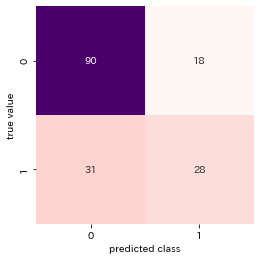

In [44]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

if __name__ == '__main__':

    uri = uri_data[uri_data['target_id'].isin([31])]
    
    iter = 4 # 実施する交差検証の回数を指定
    test_size = float(1) / iter # テストに用いるデータの比率を指定

    # 実験用データセットの読み込み
    parms = {'n_estimators':700 ,'max_depth':200, 'verbose':True}
    
    x = uri[list_features]
    x = x.to_numpy()
    y = uri[target]
    y = y.to_numpy()

    # k-分割交差検証の実施
    print('Cross Validation ( Iter = {0} )'.format(iter))
    print('-> Train data size : {:.0f}'.format(len(x) - test_size * len(x)))
    print('-> Test data size  : {:.0f}'.format(len(x) * test_size))
    print('------------------------')

    i = 0
    kf = KFold(n_splits=iter, shuffle=True, random_state=0)
    clf_ = RandomForestClassifier(random_state=10, n_estimators=parms['n_estimators'] , max_depth=parms['max_depth'], verbose=parms['verbose'])
    for train_i, test_i in kf.split(x):
        train_x, test_x = x[train_i], x[test_i]
        train_y, test_y = y[train_i], y[test_i]
        clf = clf_.fit(train_x, train_y)
        print('  k={0}: {1}'.format(i, clf.score(test_x, test_y)))
        
        clf_.fit(train_x, train_y)
        predict_y = clf_.predict(test_x)
        f1 = classification_report(test_y, predict_y, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
        print(f1)
        
        score = accuracy_score(test_y, predict_y)
        print("score : ", int(((score*100)+0.5)), "%(", score,")")
        print(clf_.feature_importances_)
        
        i += 1
    confusionmatrix(test_y, predict_y)

# 便利コマンド 

In [26]:
#データフレームの特定の行の要素を配列として出力する
target_id = set(RECORD['target_id'])
target_id = list(target_id)
target_id
len(target_id)

[29,
 30,
 31,
 32,
 33,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 48,
 49,
 50,
 53,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 65,
 67,
 68,
 71,
 72,
 73,
 74,
 75,
 77,
 79,
 84,
 85,
 88,
 89,
 92,
 95,
 98,
 110,
 120]

45

In [11]:
#データフレームの特定の行の要素を配列として出力する
target_id = set(RECORD['year-month-date'])
target_id = list(target_id)
target_id
len(target_id)

['2018-05-23',
 '2018-05-31',
 '2018-05-24',
 '2018-05-30',
 '2018-06-15',
 '2018-06-09',
 '2018-06-22',
 '2018-06-24',
 '2018-06-26',
 '2018-05-02',
 '2018-06-03',
 '2018-06-14',
 '2018-05-19',
 '2018-05-11',
 '2018-05-10',
 '2018-05-15',
 '2018-05-06',
 '2018-06-16',
 '2018-05-01',
 '2018-05-04',
 '2018-05-20',
 '2018-06-29',
 '2018-06-05',
 '2018-05-12',
 '2018-05-07',
 '2018-06-01',
 '2018-06-04',
 '2018-06-07',
 '2018-06-19',
 '2018-05-13',
 '2018-06-17',
 '2018-06-02',
 '2018-06-06',
 '2018-06-21',
 '2018-05-14',
 '2018-06-18',
 '2018-05-09',
 '2018-06-13',
 '2018-06-25',
 '2018-05-21',
 '2018-05-18',
 '2018-05-16',
 '2018-06-30',
 '2018-06-12',
 '2018-06-08',
 '2018-05-03',
 '2018-05-29',
 '2018-05-05',
 '2018-05-26',
 '2018-05-08',
 '2018-05-28',
 '2018-05-25',
 '2018-06-20',
 '2018-06-23',
 '2018-06-27',
 '2018-05-17',
 '2018-05-27',
 '2018-06-11',
 '2018-06-10',
 '2018-05-22',
 '2018-06-28']

61

In [17]:
#データフレームの特定の行の要素を配列として出力する
record_type = set(RECORD['record_type'])
record_type = list(record_type)
record_type
len(record_type)

['排便量',
 '食事量(副食)',
 '排泄介助',
 '服薬',
 '排泄方法',
 '目的',
 '活力朝礼',
 'ラジオ体操',
 '更衣介助',
 '食事量(主食)',
 '口腔内清掃',
 '処置の部位',
 '食事介助',
 '入浴方法',
 '外出場所',
 '対応内容',
 '種別',
 '水分量',
 '便の状態',
 '排尿量',
 '義歯洗浄',
 '処置内容',
 '入浴介助']

23

In [33]:
for j in excretion.columns:
    print(j)    

id
date
start
finish
created_at
updated_at
record_type
value
user
act
target_id
target_role
activity2user_id
act_id
year
month
year-month-date
ID_act
ID_record_type
ID_value
ID_target_role
hour
min_day
year-month-date-hour
ID_past_value
main_amount
sub_amount
excretion
water
is_morning
is_lunch
is_dinner
is_oyatsu
is_snack
main_amount_morning
main_amount_lunch
main_amount_dinner
main_amount_oyatsu
main_amount_snack
sub_amount_morning
sub_amount_lunch
sub_amount_dinner
sub_amount_oyatsu
sub_amount_snack
water_morning
water_lunch
water_dinner
water_oyatsu
water_snack
past_value
meal_amount
meal_amount_morning
meal_amount_lunch
meal_amount_dinner
meal_amount_oyatsu
meal_amount_snack
week_day
past_water_hour
past_meal_hour
past_uri_hour
past_exc_hour
future_uri_hour
future_exc_hour
U_17


In [27]:
#IDごとに辞書を作る
target_No = {}
num = 1
for i in target_id:
    if i == 'FILL':
        continue
    target_No[i] = num
    num = num + 1
target_No['FILL'] = 76
target_No

{'e7b14234-36ad-47cf-98fd-cbf8e6081ee3': 1,
 '0cb5c0a6-6b5a-400a-b4f3-89b215e642fc': 2,
 '129259f1-ce00-4715-8108-1a63c2d02f80': 3,
 '23a46951-9e4f-4b34-9807-69bc8a062a19': 4,
 '527c0bd1-0877-45ab-b615-8258e2e579ad': 5,
 '01828c91-5f47-45b5-b063-46d48d6215f3': 6,
 '59331efe-e5b6-4b5f-a8cd-a8fa30842f94': 7,
 '13482a5e-5180-45b4-be9a-d40c7e60f251': 8,
 '8d05ec6d-1304-416f-996b-3260607c3d26': 9,
 '89c68e25-4793-4811-be45-9efa9c0a6ea5': 10,
 '90b96d4e-ccdd-4753-a6d3-f502be68f20b': 11,
 '3766bb0f-8ef9-4d9d-84c5-8d20e12c6aff': 12,
 '85b6e789-54a8-4b4d-94bd-374eecce0cdb': 13,
 'e0d26aa3-8419-49c8-8caf-f8e79fec4b7e': 14,
 'e73c57d4-88eb-4ac6-8a28-c72c5ad091a3': 15,
 '4353e3fd-c731-489e-97cc-c66b329b00ad': 16,
 '7a112e20-93d8-4af2-b0b8-9d12c4644e7a': 17,
 '8451babc-e023-4239-b114-64150af57978': 18,
 '734dc1ca-aea6-4bf3-a700-94c3cfe3de8a': 19,
 'ad951949-ddc9-49db-a971-cadc91458885': 20,
 'fe890dbb-b312-4b7c-ab6c-4d0cf776b63c': 21,
 '67df1826-2316-47e7-aff1-ebc8aaeeb499': 22,
 'c8655e29-33b8-478

In [29]:
#探しているcolumnsがデータフレームの何番目にあるか
def columns_num(culumns_name, RECORD):
    count = 0
    for i in RECORD.columns:
        if i == culumns_name:
            break
        count = count + 1
    return count

In [68]:
#3時間以内に排泄があるかどうか
def excretion_time(RECORD, future_record, a):
    name = []
    
    colum_num = RECORD.columns.get_loc(future_record) 
        
    for k in range(len(RECORD)):
        if RECORD.iloc[k,colum_num] > 3:
            name.append('No')
        else:
            name.append('Yes')
    
            
    RECORD[a] = name
    
    

In [69]:
excretion_time(RECORD, 'future_uri_hour', 'uri_time')

In [ ]:
excretion_time(RECORD, 'future_uri_hour', 'uri_time')

In [67]:
hour = list(RECORD['past_excretion_minute'])
hour2 = []
for i in hour:
    if i%60 > 30:
        hour2.append((i//60) + 1)
    else:
        hour2.append(i//60)
RECORD['past_excretion_hour'] = hour2

In [ ]:
excretion = excretion.drop(['past_water_minute','past_urination_minute','past_excretion_minute','past_meal_minute'], axis=1)
excretion

In [4]:
#excretion = RECORD[RECORD['record_type'].isin(['排尿量'])]
#excretion = RECORD_re[RECORD_re['target_id'].isin([35])]
#excretion = excretion.sort_values(by='start') 
#excretion = excretion[excretion['future_urination_hour'] != 0]
#excretion = excretion[excretion['future_excretion_hour'] != 0]
#excretion

In [16]:
#日付の基準を6時にする
def day_start(RECORD):
    
    day2 = []
    
    start_colum_num = columns_num("start")
    value_colum_num = columns_num("value")
    Target_colum_num = columns_num("target_id")
    min_colum_num = columns_num("min_day")
        
    for k in range(len(RECORD)):
        Start_time = RECORD.iloc[k,start_colum_num]
        if Start_time.hour < 6:
            day2.append((Start_time - dt.timedelta(days=1)).day )
        else:
            day2.append(Start_time.day)
    
    RECORD["day2"] = day2

In [17]:
day_start(RECORD)

In [ ]:
#現在のレコードの時間が朝か昼かなどの情報をデータフレームに加えるメソッド
#説明変数として加えようと思ったが今は不要か
def day_night(RECORD):
    DayNight = []
    for k in range(len(RECORD)):
        starthour = RECORD.iloc[k,21]
        if 5 <=starthour <= 10:
            period = '朝'
        elif 11 <=starthour <= 14:
            period = '昼'
        elif 15 <=starthour <= 17:
            period = '夕'
        else:
            period = '夜'
        DayNight.append(period)
    RECORD['Day_night'] = DayNight
    #print(DayNight)

In [ ]:
day_night(RECORD)

In [ ]:
uri_value = []
uri = 0
for k in range(len(RECORD)):
    if RECORD.iloc[k,6] == '排尿量':
        if RECORD.iloc[k,7] == '少量':
            uri = 100
        elif RECORD.iloc[k,7] == '中量':
            uri = 200
        elif RECORD.iloc[k,7] == '多量':
            uri = 300
        else:
            uri = 200
    else:
       uri = 0
    
    uri_value.append(uri)

RECORD['uri_value'] = uri_value

In [35]:
excretion = excretion[pd.to_datetime('2018-06-29 00:00:00+09:00') <= excretion['start']][excretion['target_id'].isin([92,36])]

<ipython-input-35-a4b09503f3be>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  excretion = excretion[pd.to_datetime('2018-06-29 00:00:00+09:00') <= excretion['start']][excretion['target_id'].isin([92,36])]


In [ ]:
RECORD['hour'] = RECORD['start'].dt.hour
RECORD['min_day'] = (RECORD['start'].dt.hour*60) + RECORD['start'].dt.minute
RECORD['year-month-date-hour'] = RECORD['year'] + '-'+ RECORD['month'] + '-' + RECORD['date'] + '-' + RECORD['hour'].astype('str').str.zfill(2)

In [ ]:
for i in range(len(RECORD.columns)):
    RECORD.iloc[0,i]

In [ ]:
mydict = {"apple":1, "orange":2, "banana":3}
mydict["apple"] = mydict["apple"] + 1
mydict["apple"]

# メソッドの墓場

In [ ]:
#前回のレコードからどのくらいの時間が経っているかの配列を作る関数
#引数は(データフレーム、知りたいレコード、配列名)
#データフレームのcolum列に依存しているため、データフレームの構造が変わると動かないことに注意
#実行の際はあらかじめ時間順にソートしておくこと!
#排尿量と水分量だけのデータフレームにする→この関数を動かす→排尿量だけのデータフレームにする→学習
def past_minute(RECORD, record_type, a):
    Minute = 0
    Day = 0
    name = []
    
    id = []
    id = [RECORD['target_id']]
    id = set(id[0])
    id = list(id)
    Target_id_minute = {}
    for i in range(len(id)):
        Target_id_minute[id[i]] = 0
        
    Target_id_day = {}
    for j in range(len(id)):
        Target_id_day[id[j]] = 0
    
    
    for k in range(len(RECORD)):
        starttime = RECORD.iloc[k,2]
        Target_id = RECORD.iloc[k,10]
        #初期値処理
        if Target_id_minute[Target_id] == 0:
            name.append(round(starttime.hour*60+starttime.minute,-1))
            Target_id_day[Target_id] = starttime.day
            if RECORD.iloc[k,6] == record_type:
                Target_id_minute[Target_id] = round(starttime.hour*60+starttime.minute,-1)
            continue
        
        if starttime.day != Target_id_day[Target_id]:
            name.append(round(starttime.hour*60+starttime.minute + 1440 - Target_id_minute[Target_id],-1))
        else:
            name.append(round(starttime.hour*60+starttime.minute - Target_id_minute[Target_id],-1))
            
        if RECORD.iloc[k,6] == record_type:
            Target_id_minute[Target_id] = round(starttime.hour*60+starttime.minute,-1)
            Target_id_day[Target_id] = starttime.day
        #print(Target_id_minute)
        #print(Target_id_day)
    #print(name)
    RECORD[a] = name

In [ ]:
#前回のレコードからどのくらいの時間が経っているかの配列を作る関数
#引数は(データフレーム、知りたいレコード、配列名)
#データフレームのcolum列に依存しているため、データフレームの構造が変わると動かないことに注意
#実行の際はあらかじめ時間順にソートしておくこと!
#過去の排便・排尿時間を軸に過去の食事・水分時間を知るメソッド
def past_hour2(RECORD, search_record, flag_record, a):
    name = []
    
    
    id = []
    id = [RECORD['target_id']]
    id = set(id[0])
    id = list(id)
    Target_id_time = {}
    Target_id_sub_time = {}
    Target_id_flag = {}    
    for i in range(len(id)):
        Target_id_time[id[i]] = 0
        Target_id_sub_time[id[i]] = 0
        Target_id_flag[id[i]] = 1
        
    for k in range(len(RECORD)):
        starttime = RECORD.iloc[k,2]
        Target_id = RECORD.iloc[k,10]
        
        if Target_id_time[Target_id] == 0:
            name.append(0)
            #初期値処理
            if RECORD.iloc[k,6] == search_record:
                Target_id_time[Target_id] = starttime
                Target_id_sub_time[Target_id] = starttime
            continue
                
        PastHour = round((starttime - Target_id_time[Target_id])/timedelta(hours=1))
    
        name.append(PastHour)
        
        
        if RECORD.iloc[k,6] == flag_record:
            Target_id_flag[Target_id] = 1
            Target_id_time[Target_id] = Target_id_sub_time[Target_id]
            
        if RECORD.iloc[k,6] == search_record:
            if Target_id_flag[Target_id] == 1:
                Target_id_time[Target_id] = starttime
                Target_id_sub_time[Target_id] = starttime
                Target_id_flag[Target_id] = 0
                
            elif Target_id_flag[Target_id] == 0:
                Target_id_sub_time[Target_id] = starttime
                
    
    RECORD[a] = name
    

# 遊ぶよう

In [10]:
excretion = RECORD[RECORD['record_type'].isin(["水分量", '排尿量', "食事量(主食)", "食事量(副食)", "入浴方法", "排便量"])]

In [38]:
excretion = excretion[excretion['target_id'].isin([29,31])]

In [ ]:
b = 2
excretion.iloc[8,2]
a = excretion.iloc[8,2] - dt.timedelta(hours = b)
a
c = excretion[excretion['start'] < excretion.iloc[8,2]]
d = c[c['start'] > a]
c
d

In [36]:
type(excretion.iloc[8,2])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
print(excretion.iloc[8,2])

2018-05-02 01:40:55+09:00


In [57]:
s_bool = ((RECORD['record_type'] == "食事量(主食)")|(RECORD['record_type'] =="食事量(副食)"))
s_bool.sum()

16283

In [59]:
s_bool = RECORD['record_type'] == "食事量()"
s_bool.sum()

0

In [9]:
aaa = RECORD[RECORD['record_type'].isin(["水分量"])]

In [13]:
type(aaa.iloc[0,7])

str

In [15]:
type(int(aaa.iloc[0,7]))

int

In [57]:
past_hour(excretion, 0, 2, 0)

In [43]:
RECORD_id

NameError: name 'RECORD_id' is not defined

In [17]:
uri = excretion[excretion["feature_flag"] ==True]

In [20]:
uri[list_features]

min_day  Bath_Time  Drink_Time  Amount_Water  Meal_Time  Urine_Time  Def_Time
38569      585          0           0             0          0           1         1
38596      585          0           0             0          0           1         0
38594      585          0           0             0          0           1         0
38591      585          0           0             0          0           1         0
38589      585          0           0             0          0           1         0
...        ...        ...         ...           ...        ...         ...       ...
11239      450          0           0             0          0           1         0
11237      450          0           0             0          0           1         0
3201       495          0           1           300          1           0         0
62400      510          0           0             0          0           1         0
62398      510          0           0             0          0           1         0

[6658 rows x 7 columns]

In [21]:
uri[target]

38569    0
38596    0
38594    0
38591    0
38589    0
        ..
11239    0
11237    0
3201     1
62400    0
62398    0
Name: urine_nonurine, Length: 6658, dtype: int64

In [34]:
uri = uri_data[uri_data['target_id'].isin([29])]

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


activity_type_id               1855
activity                       1855
activity_group                 4827
created_at                        1
started_at                    19380
finished_at                   22897
deleted_at                   807024
user_tag                     836627
target_user_ids              287854
room                            741
floor                        836627
record_type_id               171092
name                         171271
value                        279699
pseudonymized_customer_id       739
pseudonymized_user_id          1381
customer_birthdate              741
care_level                   372195
customer_sex                    739
role                           1381
dtype: int64

In [15]:
record = pd.read_csv("./202111_new_data-20220405T023020Z-001/202111_new_data/cleaned.csv", index_col=0)
len(record)

3249

In [5]:
record = record.fillna('FILL')

In [6]:
aaa = record.loc[(record["value"] != "FILL")]
record = record.fillna('FILL')

In [42]:
record.iloc[1,13] == "FILL"

True

In [16]:
record = pd.read_csv("./202111_new_data-20220405T023020Z-001/202111_new_data/tmp_anonymized_1.csv", index_col=0)
record.isnull().sum()

c:\users\ucchi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


activity_type_id               1855
activity                       1855
activity_group                 4827
created_at                        1
started_at                    19380
finished_at                   22897
deleted_at                   807024
user_tag                     836627
target_user_ids              287854
room                            741
floor                        836627
record_type_id               171092
name                         171271
value                        279699
pseudonymized_customer_id       739
pseudonymized_user_id          1381
customer_birthdate              741
care_level                   372195
customer_sex                    739
role                           1381
dtype: int64

In [25]:
target_No

{'e7b14234-36ad-47cf-98fd-cbf8e6081ee3': 1,
 '0cb5c0a6-6b5a-400a-b4f3-89b215e642fc': 2,
 '129259f1-ce00-4715-8108-1a63c2d02f80': 3,
 '23a46951-9e4f-4b34-9807-69bc8a062a19': 4,
 '527c0bd1-0877-45ab-b615-8258e2e579ad': 5,
 '01828c91-5f47-45b5-b063-46d48d6215f3': 6,
 '59331efe-e5b6-4b5f-a8cd-a8fa30842f94': 7,
 '13482a5e-5180-45b4-be9a-d40c7e60f251': 8,
 '8d05ec6d-1304-416f-996b-3260607c3d26': 9,
 '89c68e25-4793-4811-be45-9efa9c0a6ea5': 10,
 '90b96d4e-ccdd-4753-a6d3-f502be68f20b': 11,
 '3766bb0f-8ef9-4d9d-84c5-8d20e12c6aff': 12,
 '85b6e789-54a8-4b4d-94bd-374eecce0cdb': 13,
 'e0d26aa3-8419-49c8-8caf-f8e79fec4b7e': 14,
 'e73c57d4-88eb-4ac6-8a28-c72c5ad091a3': 15,
 '4353e3fd-c731-489e-97cc-c66b329b00ad': 16,
 '7a112e20-93d8-4af2-b0b8-9d12c4644e7a': 17,
 '8451babc-e023-4239-b114-64150af57978': 18,
 '734dc1ca-aea6-4bf3-a700-94c3cfe3de8a': 19,
 'ad951949-ddc9-49db-a971-cadc91458885': 20,
 'fe890dbb-b312-4b7c-ab6c-4d0cf776b63c': 21,
 '67df1826-2316-47e7-aff1-ebc8aaeeb499': 22,
 'c8655e29-33b8-478

In [41]:
count = []
hour_time = []
for i in range(1,49):
    count.append(0) 
    hour_time.append(i)